# Machine Learning Group 8

# 1. Imports

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pointbiserialr
from sklearn import metrics


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import  SelectFromModel, SelectKBest, f_classif
from sklearn.linear_model import LassoCV

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier


import time
from sklearn.impute import KNNImputer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, auc
from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D


### Import Datasets

In [2]:
train = pd.read_csv('train.csv', sep = ',')
train.head(5)

encounter_id country  patient_id             race  gender      age weight  \
0        533253     USA       70110        Caucasian  Female  [70-80)      ?   
1        426224     USA    29775006  AfricanAmerican    Male  [50-60)      ?   
2        634063     USA    80729253        Caucasian  Female  [60-70)      ?   
3        890610     USA     2919042  AfricanAmerican    Male  [60-70)      ?   
4        654194     USA    84871971        Caucasian  Female  [70-80)      ?   

  payer_code  outpatient_visits_in_previous_year  \
0          ?                                   0   
1          ?                                   0   
2          ?                                   0   
3         MC                                   0   
4         HM                                   1   

   emergency_visits_in_previous_year  ...  secondary_diagnosis  \
0                                  0  ...                  276   
1                                  0  ...                  785   
2                                  0  ...                  135   
3                                  0  ...                  562   
4                                  0  ...                  599   

  additional_diagnosis number_diagnoses  glucose_test_result a1c_test_result  \
0                  466                8                  NaN             NaN   
1                  162                9                  NaN             NaN   
2                  250                6                  NaN             NaN   
3                  455                5                  NaN             NaN   
4                  428                9                  NaN             NaN   

  change_in_meds_during_hospitalization  prescribed_diabetes_meds  \
0                                    No                        No   
1                                    No                       Yes   
2                                    Ch                       Yes   
3                                    No                        No   
4                                    No                        No   

                   medication  readmitted_binary  readmitted_multiclass  
0                          []                 No               >30 days  
1                 ['insulin']                 No                     No  
2  ['glimepiride', 'insulin']                 No                     No  
3                          []                 No                     No  
4                          []                 No               >30 days  

[5 rows x 31 columns]

In [4]:
df_test = pd.read_csv('test.csv', sep = ',')
df_test.head(5)

encounter_id country  patient_id             race gender      age weight  \
0        499502     USA   103232799        Caucasian   Male  [80-90)      ?   
1        447319     USA    93395304        Caucasian   Male  [20-30)      ?   
2        309126     USA     6281586  AfricanAmerican   Male  [30-40)      ?   
3        181183     USA    67381308        Caucasian   Male  [50-60)      ?   
4        359339     USA    71670204        Caucasian   Male  [60-70)      ?   

  payer_code  outpatient_visits_in_previous_year  \
0         HM                                   0   
1         HM                                   0   
2          ?                                   0   
3         BC                                   0   
4          ?                                   0   

   emergency_visits_in_previous_year  ...  number_of_medications  \
0                                  0  ...                     14   
1                                  0  ...                      7   
2                                  0  ...                     12   
3                                  0  ...                     16   
4                                  0  ...                     10   

  primary_diagnosis secondary_diagnosis  additional_diagnosis  \
0               491                 414                   250   
1            250.13                  70                   794   
2               786               250.6                   536   
3               820                 873                  E884   
4               599                 427                   414   

  number_diagnoses glucose_test_result  a1c_test_result  \
0                6                 NaN              NaN   
1                7                >300              NaN   
2                6                 NaN              NaN   
3                9                 NaN              NaN   
4                9                 NaN              NaN   

   change_in_meds_during_hospitalization  prescribed_diabetes_meds  \
0                                     No                       Yes   
1                                     No                        No   
2                                     No                       Yes   
3                                     Ch                       Yes   
4                                     No                       Yes   

                              medication  
0                          ['metformin']  
1                                     []  
2                            ['insulin']  
3  ['metformin', 'glyburide', 'insulin']  
4                          ['metformin']  

[5 rows x 29 columns]

In [5]:
df_test.shape

(30530, 29)

# 2. Data Pre Processing

### 2.1 Train-Validation Split

In [6]:
df = train.copy()

In [7]:
X = df.drop(['readmitted_binary', 'readmitted_multiclass'], axis=1)
y= df['readmitted_binary']

In [8]:
X_train, X_val, y_train_binary, y_val_binary = train_test_split(X, y, train_size=0.8, random_state=42)

### 2.2 Visualization

#### 2.2.1 Numerical Features

In [9]:
metric_features = []
for col in X_train.columns:
    if X_train[col].dtype == 'int64' or X_train[col].dtype == 'float64':
        metric_features.append(col)

print("Metric:", metric_features)

Metric: ['encounter_id', 'patient_id', 'outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year', 'inpatient_visits_in_previous_year', 'average_pulse_bpm', 'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses']


##### 2.2.1.1 Outpatient, Emergency, Inpatient Visits

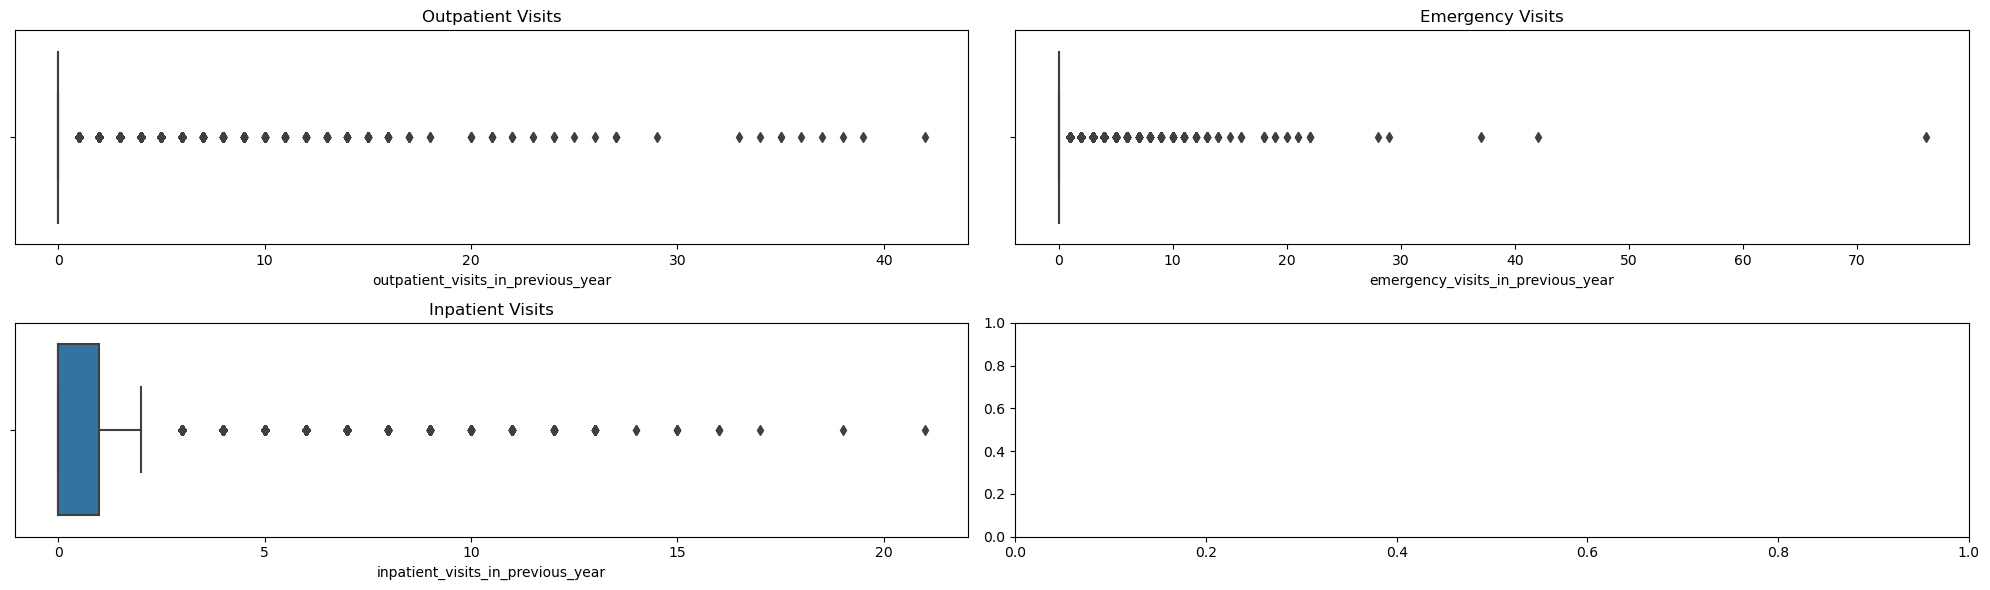

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(20, 6))

sns.boxplot(ax = axes[0][0], data = X_train, x = 'outpatient_visits_in_previous_year')
axes[0][0].set_title('Outpatient Visits')
sns.boxplot(ax = axes[0][1], data = X_train, x = 'emergency_visits_in_previous_year')
axes[0][1].set_title('Emergency Visits')
sns.boxplot(ax = axes[1][0], data = X_train, x = 'inpatient_visits_in_previous_year')
axes[1][0].set_title('Inpatient Visits')


plt.tight_layout()
plt.show()

##### 2.2.1.2 average_pulse_bpm, length_of_stay_in_hospital, number_of_medications, number_diagnoses, number_lab_tests, non_lab_procedures

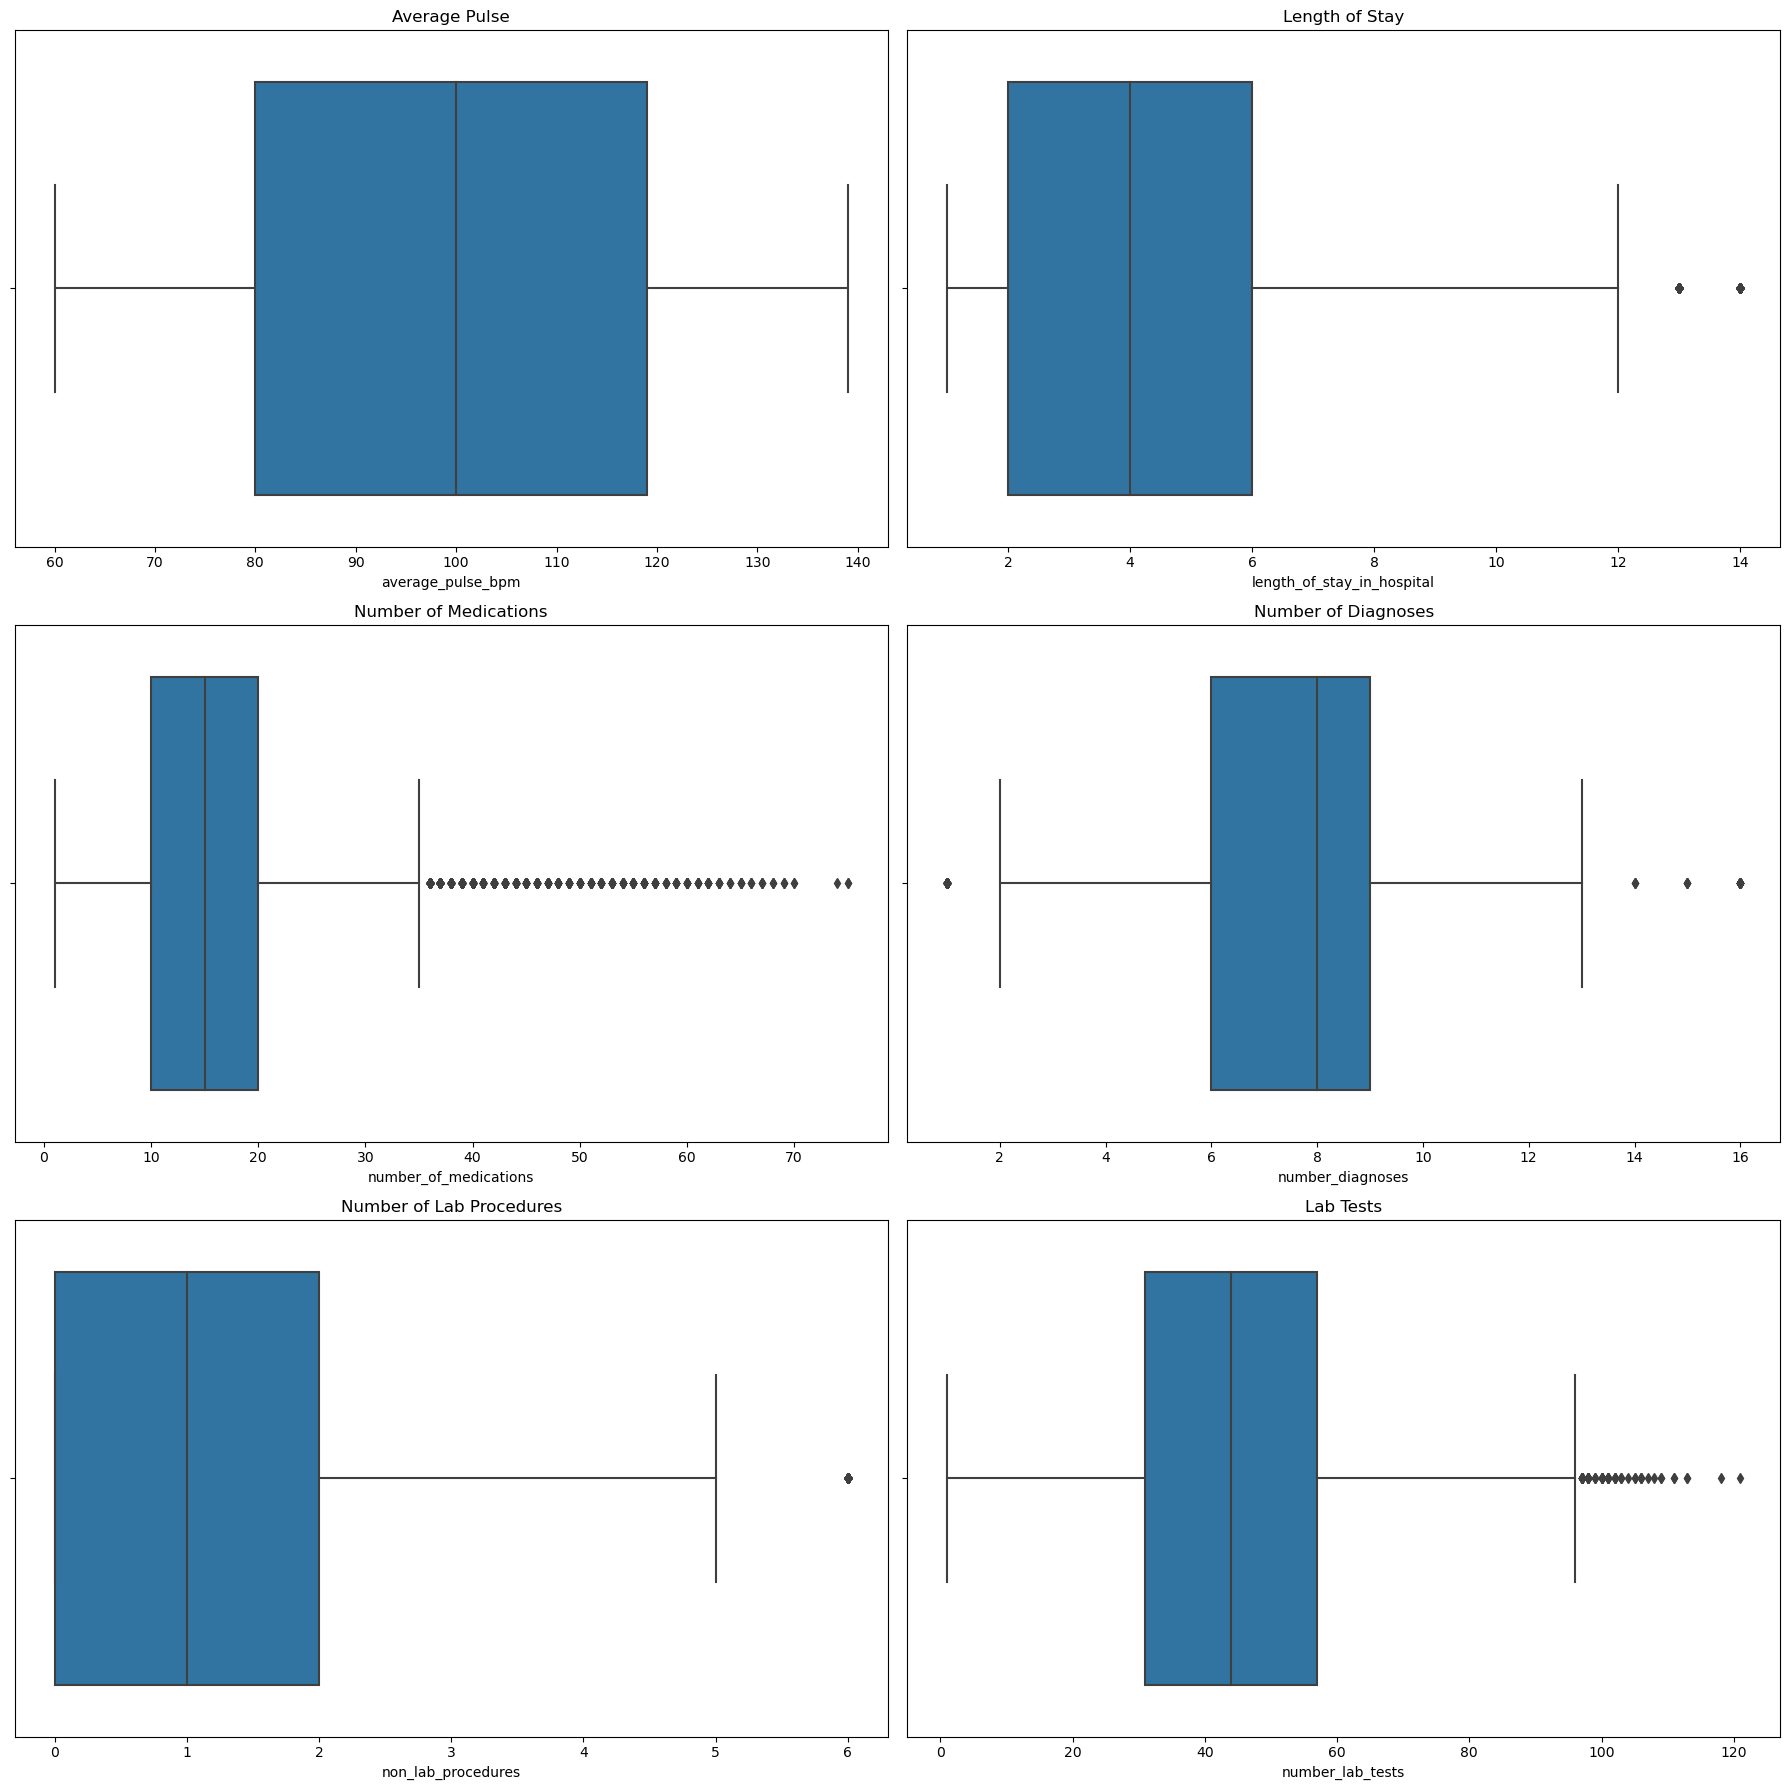

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Plot the MNT features
sns.boxplot(ax=axes[0][0], data=X_train, x='average_pulse_bpm')
axes[0][0].set_title('Average Pulse')
sns.boxplot(ax=axes[0][1], data=X_train, x='length_of_stay_in_hospital')
axes[0][1].set_title('Length of Stay')
sns.boxplot(ax=axes[1][0], data=X_train, x='number_of_medications')
axes[1][0].set_title('Number of Medications')
sns.boxplot(ax=axes[1][1], data=X_train, x='number_diagnoses')
axes[1][1].set_title('Number of Diagnoses')
sns.boxplot(ax=axes[2][0], data=X_train, x='non_lab_procedures')
axes[2][0].set_title('Number of Lab Procedures')
sns.boxplot(ax=axes[2][1], data=X_train, x='number_lab_tests')
axes[2][1].set_title('Lab Tests')

plt.tight_layout()
plt.show()

#### 2.2.2 Categorical Features

In [12]:
non_metric_features = []

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        non_metric_features.append(col)

print("Non-metric:", non_metric_features)

Non-metric: ['country', 'race', 'gender', 'age', 'weight', 'payer_code', 'admission_type', 'medical_specialty', 'discharge_disposition', 'admission_source', 'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis', 'glucose_test_result', 'a1c_test_result', 'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds', 'medication']


In [13]:
# value counts for all non-metric features
for col in non_metric_features:
    print(X_train[col].value_counts())
    print()

country
USA    56988
Name: count, dtype: int64

race
Caucasian          40524
AfricanAmerican    10210
?                   1224
Hispanic            1082
Other                803
Asian                340
Name: count, dtype: int64

gender
Female             30601
Male               26384
Unknown/Invalid        3
Name: count, dtype: int64

age
[70-80)     13906
[60-70)     11953
[50-60)      9209
[80-90)      9169
[40-50)      5087
[30-40)      2039
[90-100)     1487
[20-30)       842
[10-20)       382
[0-10)         87
Name: count, dtype: int64

weight
?            55165
[75-100)       740
[50-75)        520
[100-125)      373
[125-150)       80
[25-50)         56
[0-25)          28
[150-175)       17
[175-200)        7
>200             2
Name: count, dtype: int64

payer_code
?     22529
MC    18121
HM     3445
SP     2788
BC     2674
MD     1990
CP     1432
UN     1403
CM     1099
OG      604
PO      317
DM      301
WC       79
CH       78
OT       48
MP       47
SI       32
FR        1

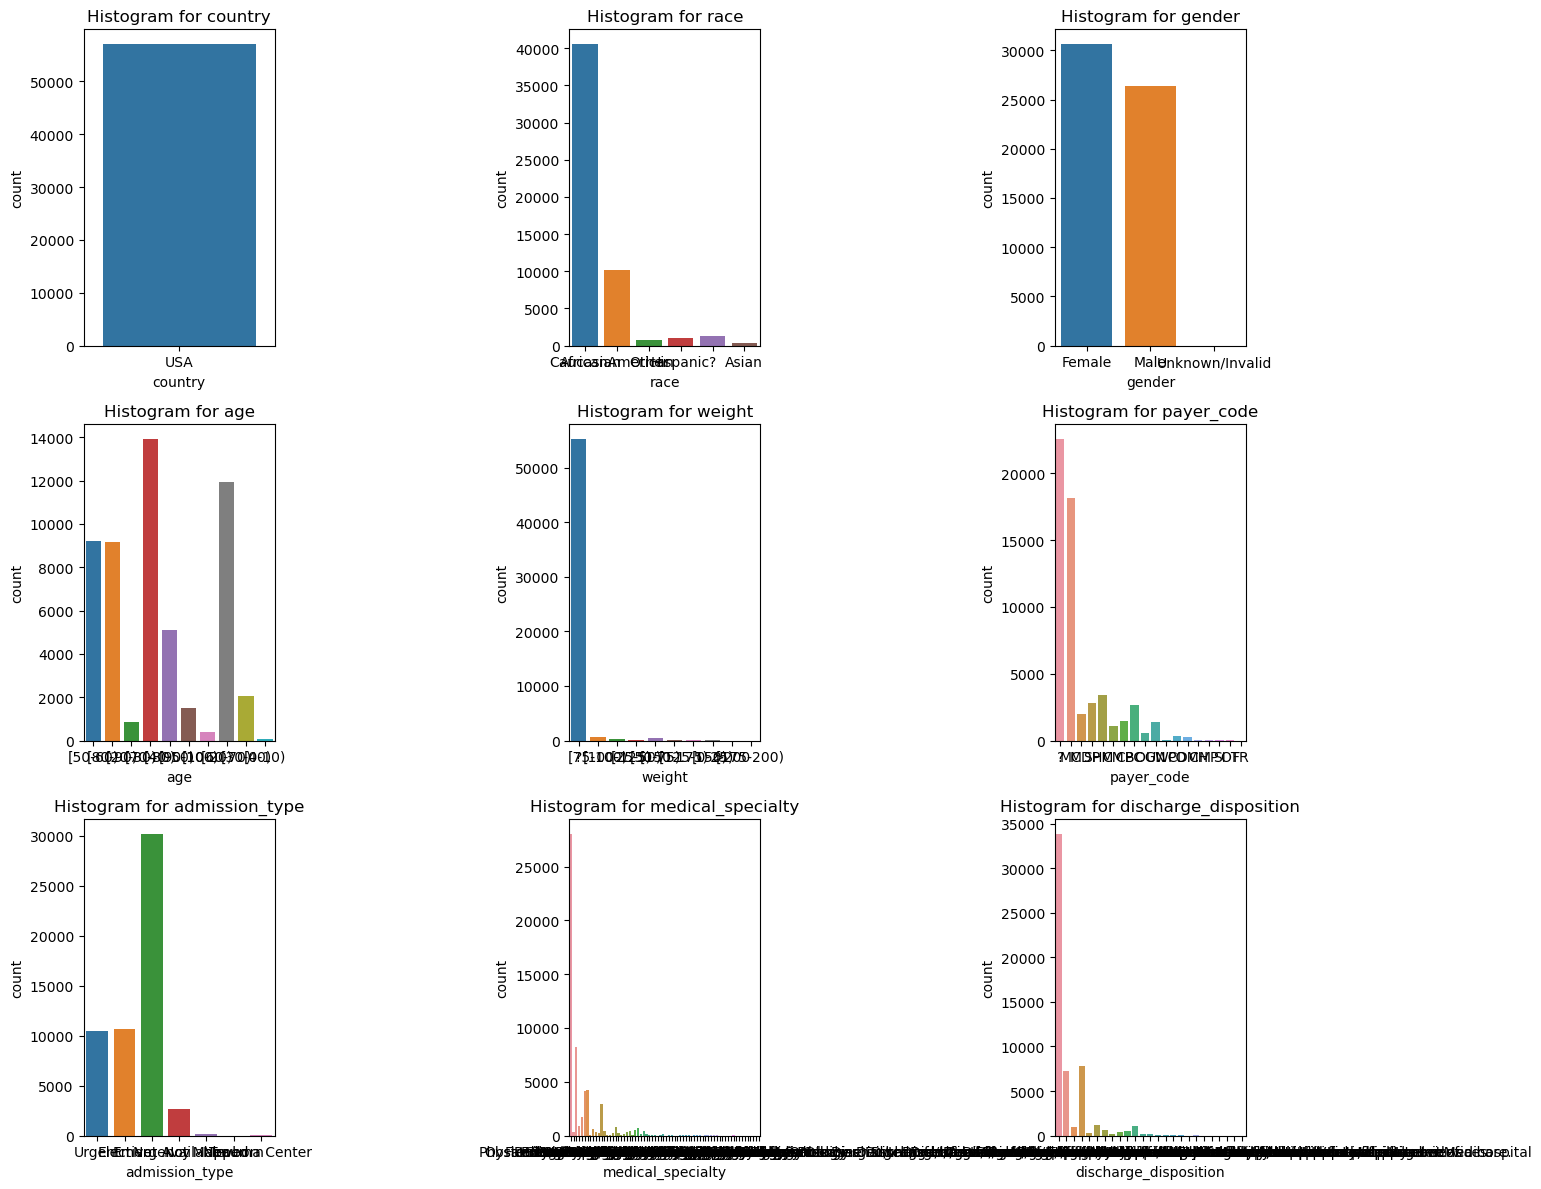

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

axes = axes.flatten()

# Plot histograms for the first 9 features
for i, feature in enumerate(non_metric_features[:9]):
    sns.countplot(data=X_train, x=feature, ax=axes[i])
    axes[i].set_title(f'Histogram for {feature}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


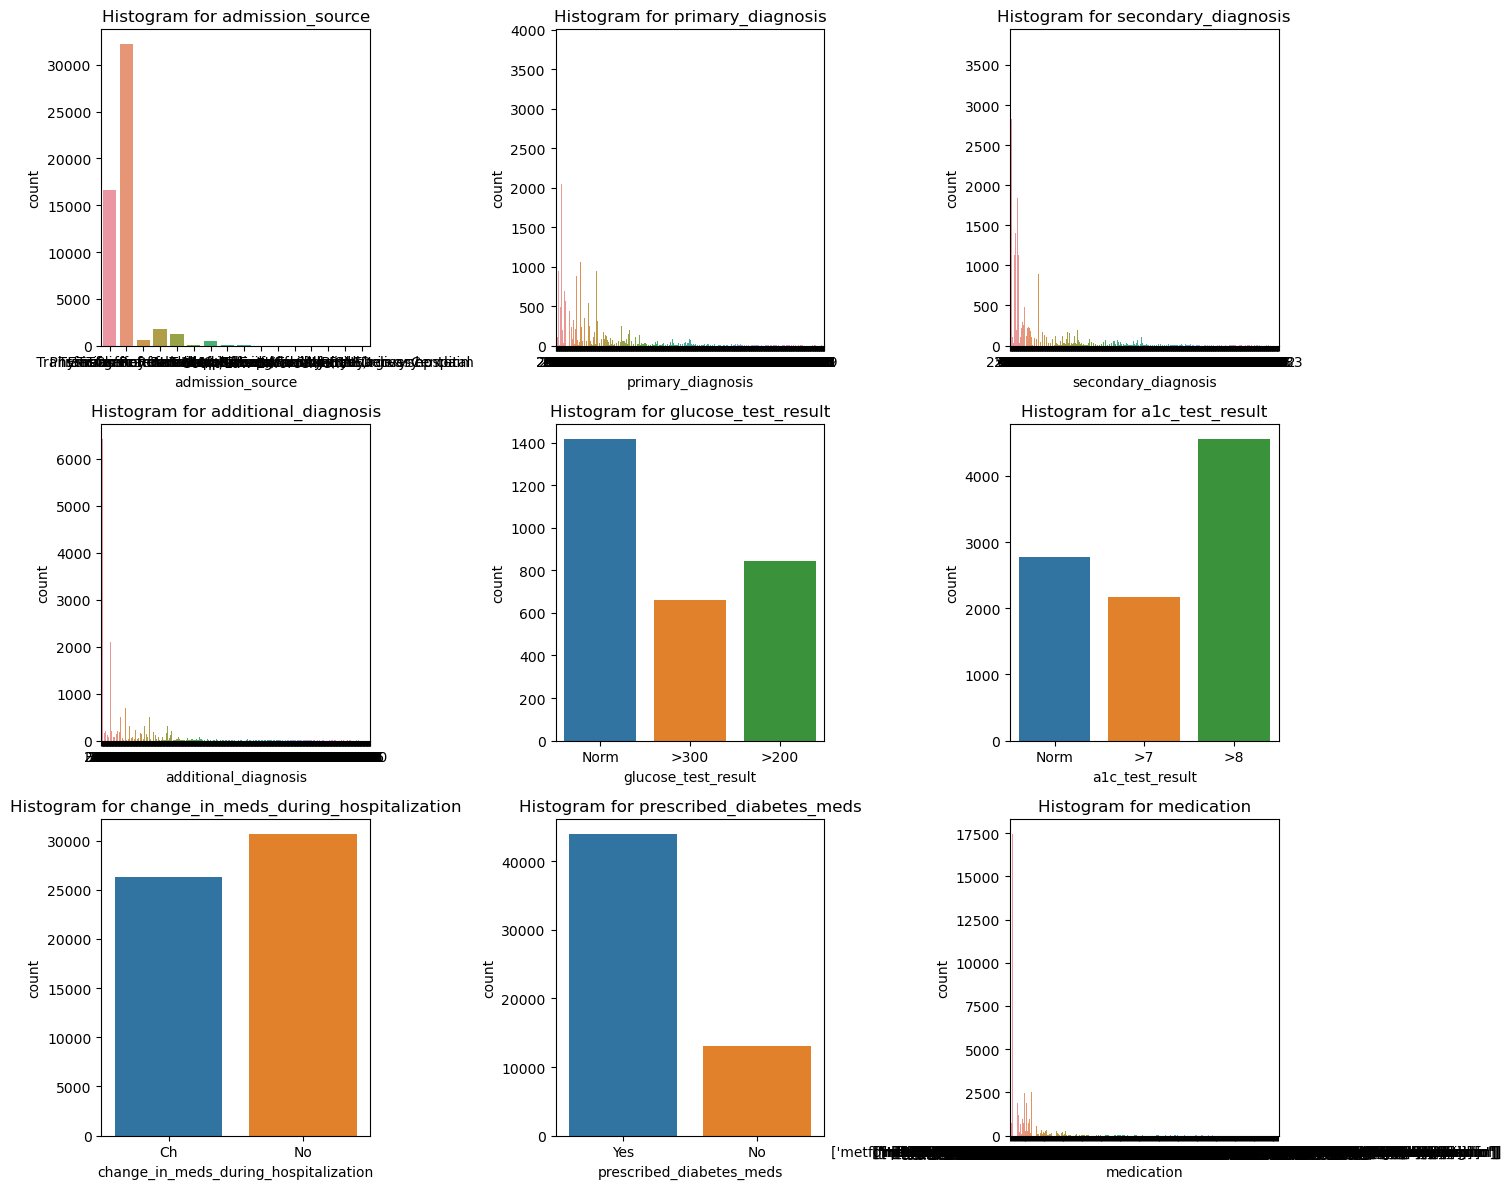

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

axes = axes.flatten()

# Plot histograms for the last 9 features
for i, feature in enumerate(non_metric_features[9:]):
    sns.countplot(data=X_train, x=feature, ax=axes[i])
    axes[i].set_title(f'Histogram for {feature}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### 2.3 Outliers

In [16]:
df_outliers = X_train.copy()
df_outliers_val = X_val.copy()
df_outliers_test = df_test.copy()

#### 2.3.1 Manual Outliers

In [17]:
df_outliers.columns

Index(['encounter_id', 'country', 'patient_id', 'race', 'gender', 'age',
       'weight', 'payer_code', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'average_pulse_bpm', 'discharge_disposition',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'medication'],
      dtype='object')

In [18]:
def outliers_to_nan(df_outliers, columns_and_thresholds):
    for column, threshold in columns_and_thresholds.items():
        if column == 'number_diagnoses':
            condition = (df_outliers[column] > threshold) | (df_outliers[column] == 1)
        else:
            condition = df_outliers[column] >= threshold
        df_outliers.loc[condition, column] = None  

columns_and_thresholds = {
    'number_of_medications': 70,
    'length_of_stay_in_hospital': 14,
    'number_diagnoses': 14,
    'number_lab_tests': 111,
    'outpatient_visits_in_previous_year': 30,
    'emergency_visits_in_previous_year': 25,
    'inpatient_visits_in_previous_year': 19,
}

for df in [df_outliers, df_outliers_val, df_outliers_test]:
    outliers_to_nan(df, columns_and_thresholds)

original_size = df_outliers.shape[0]
percentage_outliers = round(df_outliers[list(columns_and_thresholds)].isna().sum().sum() / original_size * 100, 2)
print('Percentage of outliers in total:', percentage_outliers, '%')

for df in [df_outliers, df_outliers_val, df_outliers_test]:
    df[metric_features] = df[metric_features].fillna(df[metric_features].mode().iloc[0])


Percentage of outliers in total: 1.36 %


#### 2.3.2 IQR Outliers

In [19]:
q25 = df_outliers[metric_features].quantile(.25)
q75 = df_outliers[metric_features].quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(df_outliers[metric].between(llim, ulim, inclusive='both'))

filters2 = pd.Series(np.all(filters2, axis=0), index=df_outliers.index)
df_2 = df_outliers[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / df_outliers.shape[0], 4)* 100, '%')

Percentage of data kept after removing outliers: 66.72 %


### 2.4 Missing Values

In [20]:
df_Nan = df_outliers.copy()
df_Nan_val = df_outliers_val.copy()
df_Nan_test = df_outliers_test.copy()

In [21]:
df_Nan.drop_duplicates(inplace=True)
df_Nan_val.drop_duplicates(inplace=True)
df_Nan_test.drop_duplicates(inplace=True)

In [22]:
df_Nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56988 entries, 43545 to 15795
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   encounter_id                           56988 non-null  int64  
 1   country                                56988 non-null  object 
 2   patient_id                             56988 non-null  int64  
 3   race                                   54183 non-null  object 
 4   gender                                 56988 non-null  object 
 5   age                                    54161 non-null  object 
 6   weight                                 56988 non-null  object 
 7   payer_code                             56988 non-null  object 
 8   outpatient_visits_in_previous_year     56988 non-null  float64
 9   emergency_visits_in_previous_year      56988 non-null  float64
 10  inpatient_visits_in_previous_year      56988 non-null  float64
 11  adm

In [23]:
df_Nan.isna().sum()/len(df_Nan)*100

encounter_id                              0.000000
country                                   0.000000
patient_id                                0.000000
race                                      4.922089
gender                                    0.000000
age                                       4.960693
weight                                    0.000000
payer_code                                0.000000
outpatient_visits_in_previous_year        0.000000
emergency_visits_in_previous_year         0.000000
inpatient_visits_in_previous_year         0.000000
admission_type                            5.204604
medical_specialty                         0.000000
average_pulse_bpm                         0.000000
discharge_disposition                     3.646382
admission_source                          6.613673
length_of_stay_in_hospital                0.000000
number_lab_tests                          0.000000
non_lab_procedures                        0.000000
number_of_medications          

In [24]:
w_r = ['?', '', 'Unknown/Invalid']
for r in w_r:
    for column in df_Nan.columns:
        df_Nan[column] = df_Nan[column].replace(r, np.nan)
        df_Nan_val[column] = df_Nan_val[column].replace(r, np.nan)
        df_Nan_test[column] = df_Nan_test[column].replace(r, np.nan)

In [25]:
df_Nan.isna().sum()/len(df_Nan)*100

encounter_id                              0.000000
country                                   0.000000
patient_id                                0.000000
race                                      7.069909
gender                                    0.005264
age                                       4.960693
weight                                   96.801081
payer_code                               39.532884
outpatient_visits_in_previous_year        0.000000
emergency_visits_in_previous_year         0.000000
inpatient_visits_in_previous_year         0.000000
admission_type                            5.204604
medical_specialty                        49.106830
average_pulse_bpm                         0.000000
discharge_disposition                     3.646382
admission_source                          6.613673
length_of_stay_in_hospital                0.000000
number_lab_tests                          0.000000
non_lab_procedures                        0.000000
number_of_medications          

In [26]:
df_Nan['glucose_test_result'] = df_Nan['glucose_test_result'].replace(np.nan, 'No test done')
df_Nan['a1c_test_result'] = df_Nan['a1c_test_result'].replace(np.nan, 'No test done')

column_change = ['race', 'gender','age','admission_type','discharge_disposition','admission_source', 'primary_diagnosis']
for column in column_change:
    df_Nan[column] = df_Nan[column].replace(np.nan, df_Nan[column].mode().iloc[0])

df_Nan['payer_code'] = df_Nan['payer_code'].replace(np.nan, 'No health insurance used')

In [27]:
df_Nan_val['glucose_test_result'] = df_Nan_val['glucose_test_result'].replace(np.nan, 'No test done')
df_Nan_val['a1c_test_result'] = df_Nan_val['a1c_test_result'].replace(np.nan, 'No test done')

columns_to_replace = ['race', 'gender', 'age', 'admission_type', 'discharge_disposition', 'admission_source', 'primary_diagnosis']
for column in columns_to_replace:
    df_Nan_val[column] = df_Nan_val[column].replace(np.nan, df_Nan[column].mode().iloc[0])

df_Nan_val['payer_code'] = df_Nan_val['payer_code'].replace(np.nan, 'No health insurance used')

In [28]:
df_Nan_test['glucose_test_result'] = df_Nan_test['glucose_test_result'].replace(np.nan, 'No test done')
df_Nan_test['a1c_test_result'] = df_Nan_test['a1c_test_result'].replace(np.nan, 'No test done')

columns_to_replace = ['race', 'gender', 'age', 'admission_type', 'discharge_disposition', 'admission_source', 'primary_diagnosis']
for column in columns_to_replace:
    df_Nan_test[column] = df_Nan_test[column].replace(np.nan, df_Nan[column].mode().iloc[0])

df_Nan_test['payer_code'] = df_Nan_test['payer_code'].replace(np.nan, 'No health insurance used')

In [29]:
df_Nan['additional_diagnosis'] = df_Nan['additional_diagnosis'].fillna('000')
df_Nan_val['additional_diagnosis'] = df_Nan_val['additional_diagnosis'].fillna('000')
df_Nan_test['additional_diagnosis'] = df_Nan_test['additional_diagnosis'].fillna('000')

df_Nan['secondary_diagnosis'] = df_Nan['secondary_diagnosis'].fillna(df_Nan['additional_diagnosis'])
df_Nan_val['secondary_diagnosis'] = df_Nan_val['secondary_diagnosis'].fillna(df_Nan_val['additional_diagnosis'])
df_Nan_test['secondary_diagnosis'] = df_Nan_test['secondary_diagnosis'].fillna(df_Nan_test['additional_diagnosis'])

df_Nan['primary_diagnosis'] = df_Nan['primary_diagnosis'].fillna(df_Nan['secondary_diagnosis'])
df_Nan_val['primary_diagnosis'] = df_Nan_val['primary_diagnosis'].fillna(df_Nan_val['secondary_diagnosis'])
df_Nan_test['primary_diagnosis'] = df_Nan_test['primary_diagnosis'].fillna(df_Nan_test['secondary_diagnosis'])

In [30]:
df_Nan['primary_diagnosis'] = df_Nan['primary_diagnosis'].fillna('000')
df_Nan_val['primary_diagnosis'] = df_Nan_val['primary_diagnosis'].fillna('000')
df_Nan_test['primary_diagnosis'] = df_Nan_test['primary_diagnosis'].fillna('000')

df_Nan['secondary_diagnosis'] = df_Nan['secondary_diagnosis'].fillna('000')
df_Nan_val['secondary_diagnosis'] = df_Nan_val['secondary_diagnosis'].fillna('000')
df_Nan_test['secondary_diagnosis'] = df_Nan_test['secondary_diagnosis'].fillna('000')

In [31]:
df_Nan.isna().sum()/len(df_Nan)*100

encounter_id                              0.000000
country                                   0.000000
patient_id                                0.000000
race                                      0.000000
gender                                    0.000000
age                                       0.000000
weight                                   96.801081
payer_code                                0.000000
outpatient_visits_in_previous_year        0.000000
emergency_visits_in_previous_year         0.000000
inpatient_visits_in_previous_year         0.000000
admission_type                            0.000000
medical_specialty                        49.106830
average_pulse_bpm                         0.000000
discharge_disposition                     0.000000
admission_source                          0.000000
length_of_stay_in_hospital                0.000000
number_lab_tests                          0.000000
non_lab_procedures                        0.000000
number_of_medications          

### 2.5 Variables Preparation

In [32]:
df_features = df_Nan.copy()
df_features_val = df_Nan_val.copy()
df_features_test = df_Nan_test.copy()

In [33]:
df_features = df_Nan.drop(['country','weight', 'medical_specialty'], axis=1)
df_features_val = df_Nan_val.drop(['country','weight', 'medical_specialty'], axis=1)
df_features_test = df_Nan_test.drop(['country','weight','medical_specialty'], axis=1)

In [34]:
df_features['gender'].replace('Male', 1, inplace=True)
df_features['gender'].replace('Female', 0, inplace=True)
df_features_val['gender'].replace('Male', 1, inplace=True)
df_features_val['gender'].replace('Female', 0, inplace=True)
df_features_test['gender'].replace('Male', 1, inplace=True)
df_features_test['gender'].replace('Female', 0, inplace=True)


df_features['change_in_meds_during_hospitalization'].replace('Ch', 1, inplace=True)
df_features['change_in_meds_during_hospitalization'].replace('No', 0, inplace=True)
df_features_val['change_in_meds_during_hospitalization'].replace('Ch', 1, inplace=True)
df_features_val['change_in_meds_during_hospitalization'].replace('No', 0, inplace=True)
df_features_test['change_in_meds_during_hospitalization'].replace('Ch', 1, inplace=True)
df_features_test['change_in_meds_during_hospitalization'].replace('No', 0, inplace=True)


df_features['prescribed_diabetes_meds'].replace('Yes', 1, inplace=True)
df_features['prescribed_diabetes_meds'].replace('No', 0, inplace=True)
df_features_val['prescribed_diabetes_meds'].replace('Yes', 1, inplace=True)
df_features_val['prescribed_diabetes_meds'].replace('No', 0, inplace=True)
df_features_test['prescribed_diabetes_meds'].replace('Yes', 1, inplace=True)
df_features_test['prescribed_diabetes_meds'].replace('No', 0, inplace=True)

In [35]:
age_id = {'[0-10)':0, 
          '[10-20)':1, 
          '[20-30)':2, 
          '[30-40)':3, 
          '[40-50)':4, 
          '[50-60)':5,
          '[60-70)':6, 
          '[70-80)':7, 
          '[80-90)':8, 
          '[90-100)':9}
df_features['age'] = df_features.age.replace(age_id)
df_features_val['age'] = df_features_val.age.replace(age_id)
df_features_test['age'] = df_features_test.age.replace(age_id)

In [36]:
category_mapping = {
    'Going home': ['Discharged to home', 'Hospice / home','Discharged/transferred to home with home health service'],
    'Going to a medical facility': ['Expired', 'Expired at home. Medicaid only, hospice.', 'Expired in a medical facility. Medicaid only, hospice.',
                                    'Discharged/transferred to another short term hospital', 'Discharged/transferred to another rehab fac including rehab units of a hospital .',
                                    'Discharged/transferred to another type of inpatient care institution', 'Discharged/transferred to ICF', 'Discharged/transferred to a long term care hospital.',
                                    'Hospice / medical facility', 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
                                    'Discharged/transferred to home under care of Home IV provider', 'Discharged/transferred within this institution to Medicare approved swing bed',
                                    'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.','Discharged/transferred to SNF',
                                    'Discharged/transferred to a federal health care facility.', 'Neonate discharged to another hospital for neonatal aftercare',
                                    'Discharged/transferred/referred to this institution for outpatient services','Discharged/transferred/referred another institution for outpatient services'],
    'Lost track': ['Not Mapped', 'Left AMA'],
    'Stays in hospital': ['Admitted as an inpatient to this hospital','Still patient or expected to return for outpatient services']
}

def categorize_discharge(discharge_type):
    for category, types in category_mapping.items():
        if discharge_type in types:
            return category

df_features['discharge_category'] = df_features['discharge_disposition'].apply(categorize_discharge)
df_features_val['discharge_category'] = df_features_val['discharge_disposition'].apply(categorize_discharge)
df_features_test['discharge_category'] = df_features_test['discharge_disposition'].apply(categorize_discharge)
category_counts = df_features['discharge_category'].value_counts()
df_features.drop('discharge_disposition', axis=1, inplace=True)
df_features_val.drop('discharge_disposition', axis=1, inplace=True)
df_features_test.drop('discharge_disposition', axis=1, inplace=True)
print(category_counts)

discharge_category
Going home                     43289
Going to a medical facility    12812
Lost track                       876
Stays in hospital                 11
Name: count, dtype: int64


In [37]:
df_features['total_procedures'] = df_features['number_lab_tests'] + df_features['non_lab_procedures']
df_features_val['total_procedures'] = df_features_val['number_lab_tests'] + df_features_val['non_lab_procedures']
df_features_test['total_procedures'] = df_features_test['number_lab_tests'] + df_features_test['non_lab_procedures']

# Drop the original features
df_features.drop(['number_lab_tests', 'non_lab_procedures'], axis=1, inplace=True)
df_features_val.drop(['number_lab_tests', 'non_lab_procedures'], axis=1, inplace=True)
df_features_test.drop(['number_lab_tests', 'non_lab_procedures'], axis=1, inplace=True)

In [38]:
df_features['medication'] = df_features['medication'].apply(
    lambda x: eval(x) if isinstance(x, str) else x
)
def process_medication_list(medication_list):
    if not medication_list:
        return ['No medication used']
    else:
        return medication_list
df_features['medication'] = df_features['medication'].apply(process_medication_list)
df_features['medications'] = df_features['medication'].apply(lambda x: ', '.join(map(str, x))).str.replace(r'\[|\]', '')
df_features_val['medication'] = df_features_val['medication'].apply(process_medication_list)
df_features_val['medications'] = df_features_val['medication'].apply(lambda x: ', '.join(map(str, x))).str.replace(r'\[|\]', '')
df_features_test['medication'] = df_features_test['medication'].apply(process_medication_list)
df_features_test['medications'] = df_features_test['medication'].apply(lambda x: ', '.join(map(str, x))).str.replace(r'\[|\]', '')


#drop the medication column
df_features.drop('medication', axis=1, inplace=True)
df_features_val.drop('medication', axis=1, inplace=True)
df_features_test.drop('medication', axis=1, inplace=True)

In [39]:
def insurance_function(value):
    if value != "No health insurance used":
        return "Used insurance"
    else:
        return value

df_features['Insurance_or_not'] = df_features['payer_code'].apply(insurance_function)
df_features_val['Insurance_or_not'] = df_features_val['payer_code'].apply(insurance_function)
df_features_test['Insurance_or_not'] = df_features_test['payer_code'].apply(insurance_function)

df_features['Insurance_or_not'].replace('Used insurance', 1, inplace=True)
df_features['Insurance_or_not'].replace('No health insurance used', 0, inplace=True)
df_features_val['Insurance_or_not'].replace('Used insurance', 1, inplace=True)
df_features_val['Insurance_or_not'].replace('No health insurance used', 0, inplace=True)
df_features_test['Insurance_or_not'].replace('Used insurance', 1, inplace=True)
df_features_test['Insurance_or_not'].replace('No health insurance used', 0, inplace=True)

df_features.drop(['payer_code'], axis=1, inplace=True)
df_features_val.drop(['payer_code'], axis=1, inplace=True)
df_features_test.drop(['payer_code'], axis=1, inplace=True)

In [40]:
conditions = [
  (df_features['glucose_test_result'] == 'No test done') & (df_features['a1c_test_result'] == 'No test done'),
  (df_features['glucose_test_result'] != 'No test done'),
  (df_features['a1c_test_result'] != 'No test done')
]
conditions_val = [
  (df_features_val['glucose_test_result'] == 'No test done') & (df_features_val['a1c_test_result'] == 'No test done'),
  (df_features_val['glucose_test_result'] != 'No test done'),
  (df_features_val['a1c_test_result'] != 'No test done')
]
conditions_test = [
  (df_features_test['glucose_test_result'] == 'No test done') & (df_features_test['a1c_test_result'] == 'No test done'),
  (df_features_test['glucose_test_result'] != 'No test done'),
  (df_features_test['a1c_test_result'] != 'No test done')
]

results = ['No test done', 'glucose_test_result: ' + df_features['glucose_test_result'], 'a1c_test_result: ' + df_features['a1c_test_result']]
results_val = ['No test done', 'glucose_test_result: ' + df_features_val['glucose_test_result'], 'a1c_test_result: ' + df_features_val['a1c_test_result']]
results_test = ['No test done', 'glucose_test_result: ' + df_features_test['glucose_test_result'], 'a1c_test_result: ' + df_features_test['a1c_test_result']]


df_features['Exams_performed_results'] = np.select(conditions, results)
df_features_val['Exams_performed_results'] = np.select(conditions_val, results_val)
df_features_test['Exams_performed_results'] = np.select(conditions_test, results_test)

df_features = df_features.drop(['glucose_test_result','a1c_test_result'], axis=1)
df_features_val = df_features_val.drop(['glucose_test_result','a1c_test_result'], axis=1)
df_features_test = df_features_test.drop(['glucose_test_result','a1c_test_result'], axis=1)

In [41]:
def categorizar_diagnostico(codigo):
        
    codigo = str(codigo)
        
    if codigo == '000':
        return 'No Diagnosis'
    elif codigo == 0:
        return 'No Diagnosis'
    elif '001' <= codigo <= '139.9':
        return 'Infection and Parasitic Diseases'
    elif '140' <= codigo <= '239.9':
        return 'Neoplasms'
    elif '240' <= codigo <= '279.9':
        return 'Endocrine, Nutritional and Metabolic Diseases and Immunity Disorders'
    elif '280' <= codigo <= '289.9':
        return 'Diseases of Blood and Blood Forming Organs'
    elif '290' <= codigo <= '319':
        return 'Mental Disorders'
    elif '320' <= codigo <= '389.9':
        return 'Diseases of Nervous System and Sense Organs'
    elif '390' <= codigo <= '459.9':
        return 'Diseases of the Circulatory System'
    elif '460' <= codigo <= '519.9':
        return 'Diseases of the Respiratory System'
    elif '520' <= codigo <= '579.9':
        return 'Diseases of the Digestive System'
    elif '580' <= codigo <= '629.9':
        return 'Diseases of the Genitourinary System'
    elif '630' <= codigo <= '676.9':
        return 'Complications of Pregnancy, Childbirth and the Puerperium'
    elif '680' <= codigo <= '709.9':
        return 'Diseases of the Skin and Subcutaneous Tissue'
    elif '710' <= codigo <= '739.9':
        return 'Diseases of the Musculoskeletal System and Connective Tissue'
    elif '740' <= codigo <= '759.9':
        return 'Congenital Anomalies'
    elif '760' <= codigo <= '779.9':
        return 'Certain Conditions Originating in the Perinatal Period'
    elif '780' <= codigo <= '799.9':
        return 'Symptoms, Signs and Ill-defined Conditions'
    elif '800' <= codigo <= '999.9':
        return 'Injury and Poisoning'
    elif 'V01' <= codigo <= 'V82.9':
        return 'Supplementary Factors Influencing Health Status and Contact with Health Services'
    else:
        return 'Other category' 


df_features['diagnosis_category_pd'] = df_features['primary_diagnosis'].apply(categorizar_diagnostico)
df_features['diagnosis_category_sd'] = df_features['secondary_diagnosis'].apply(categorizar_diagnostico)
df_features['diagnosis_category_ad'] = df_features['additional_diagnosis'].apply(categorizar_diagnostico)

df_features_val['diagnosis_category_pd'] = df_features_val['primary_diagnosis'].apply(categorizar_diagnostico)
df_features_val['diagnosis_category_sd'] = df_features_val['secondary_diagnosis'].apply(categorizar_diagnostico)
df_features_val['diagnosis_category_ad'] = df_features_val['additional_diagnosis'].apply(categorizar_diagnostico)

df_features_test['diagnosis_category_pd'] = df_features_test['primary_diagnosis'].apply(categorizar_diagnostico)
df_features_test['diagnosis_category_sd'] = df_features_test['secondary_diagnosis'].apply(categorizar_diagnostico)
df_features_test['diagnosis_category_ad'] = df_features_test['additional_diagnosis'].apply(categorizar_diagnostico)

In [42]:
green_diseases = [
    'Infection and Parasitic Diseases',
    'Diseases of Blood and Blood Forming Organs',
    'Mental Disorders',
    'Symptoms, Signs and Ill-defined Conditions',
    'Supplementary Factors Influencing Health Status and Contact with Health Services',
    'Other category'
]

yellow_diseases = [
    'Endocrine, Nutritional and Metabolic Diseases and Immunity Disorders',
    'Diseases of Nervous System and Sense Organs',
    'Diseases of the Digestive System',
    'Diseases of the Genitourinary System',
    'Diseases of the Skin and Subcutaneous Tissue',
    'Certain Conditions Originating in the Perinatal Period'
]

red_diseases = [
    'Neoplasms',
    'Diseases of the Circulatory System',
    'Diseases of the Respiratory System',
    'Complications of Pregnancy, Childbirth and the Puerperium',
    'Diseases of the Musculoskeletal System and Connective Tissue',
    'Congenital Anomalies',
    'Injury and Poisoning'
]

df_features['diagnosis_category_pd'] = df_features['diagnosis_category_pd'].apply(lambda x: 1 if x in green_diseases else (2 if x in yellow_diseases else (3 if x in red_diseases else 0)))
df_features_val['diagnosis_category_pd'] = df_features_val['diagnosis_category_pd'].apply(lambda x: 1 if x in green_diseases else (2 if x in yellow_diseases else (3 if x in red_diseases else 0)))
df_features_test['diagnosis_category_pd'] = df_features_test['diagnosis_category_pd'].apply(lambda x: 1 if x in green_diseases else (2 if x in yellow_diseases else (3 if x in red_diseases else 0)))
df_features['diagnosis_category_sd'] = df_features['diagnosis_category_sd'].apply(lambda x: 1 if x in green_diseases else (2 if x in yellow_diseases else (3 if x in red_diseases else 0)))
df_features_val['diagnosis_category_sd'] = df_features_val['diagnosis_category_sd'].apply(lambda x: 1 if x in green_diseases else (2 if x in yellow_diseases else (3 if x in red_diseases else 0)))
df_features_test['diagnosis_category_sd'] = df_features_test['diagnosis_category_sd'].apply(lambda x: 1 if x in green_diseases else (2 if x in yellow_diseases else (3 if x in red_diseases else 0)))
df_features['diagnosis_category_ad'] = df_features['diagnosis_category_ad'].apply(lambda x: 1 if x in green_diseases else (2 if x in yellow_diseases else (3 if x in red_diseases else 0)))
df_features_val['diagnosis_category_ad'] = df_features_val['diagnosis_category_ad'].apply(lambda x: 1 if x in green_diseases else (2 if x in yellow_diseases else (3 if x in red_diseases else 0)))
df_features_test['diagnosis_category_ad'] = df_features_test['diagnosis_category_ad'].apply(lambda x: 1 if x in green_diseases else (2 if x in yellow_diseases else (3 if x in red_diseases else 0)))


# Sum diagnosis points for each patient
df_features['total_diagnosis_points'] = df_features.groupby('encounter_id')['diagnosis_category_pd'].transform('sum') + df_features.groupby('encounter_id')['diagnosis_category_sd'].transform('sum') + df_features.groupby('encounter_id')['diagnosis_category_ad'].transform('sum')
df_features_val['total_diagnosis_points'] = df_features_val.groupby('encounter_id')['diagnosis_category_pd'].transform('sum') + df_features_val.groupby('encounter_id')['diagnosis_category_sd'].transform('sum') + df_features_val.groupby('encounter_id')['diagnosis_category_ad'].transform('sum')
df_features_test['total_diagnosis_points'] = df_features_test.groupby('encounter_id')['diagnosis_category_pd'].transform('sum') + df_features_test.groupby('encounter_id')['diagnosis_category_sd'].transform('sum') + df_features_test.groupby('encounter_id')['diagnosis_category_ad'].transform('sum')

# Look for the points for each age range
age_points = { 0: 0,
              1: 0, 
              2: 0, 
              3: 0, 
              4: 1, 
              5: 2,
              6: 3,
              7: 4,
              8: 5,
              9: 6
}
df_features['age_points'] = df_features['age'].map(age_points)
df_features_val['age_points'] = df_features_val['age'].map(age_points)
df_features_test['age_points'] = df_features_test['age'].map(age_points)

# Sum total points
df_features['total_points'] = df_features.groupby('encounter_id')['age_points'].transform('sum') + df_features['total_diagnosis_points']
df_features_val['total_points'] = df_features_val.groupby('encounter_id')['age_points'].transform('sum') + df_features_val['total_diagnosis_points']
df_features_test['total_points'] = df_features_test.groupby('encounter_id')['age_points'].transform('sum') + df_features_test['total_diagnosis_points']


#drop age points and total diagnosis points
df_features.drop(['age_points', 'total_diagnosis_points'], axis=1, inplace=True)
df_features_val.drop(['age_points', 'total_diagnosis_points'], axis=1, inplace=True)
df_features_test.drop(['age_points', 'total_diagnosis_points'], axis=1, inplace=True)


In [43]:
df_features.drop(['primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis', 'diagnosis_category_pd', 'diagnosis_category_sd', 'diagnosis_category_ad'], axis=1, inplace=True)
df_features_val.drop(['primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis',  'diagnosis_category_pd', 'diagnosis_category_sd', 'diagnosis_category_ad'], axis=1, inplace=True)
df_features_test.drop(['primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis',  'diagnosis_category_pd', 'diagnosis_category_sd', 'diagnosis_category_ad'], axis=1, inplace=True)

In [44]:
df_features['admission_type'] =  df_features['admission_type'].replace(['Not Available', 'Not Mapped', 'Trauma Center', 'Newborn'], 'Not Tracked')
df_features_val['admission_type'] =  df_features_val['admission_type'].replace(['Not Available', 'Not Mapped', 'Trauma Center', 'Newborn'], 'Not Tracked')
df_features_test['admission_type'] =  df_features_test['admission_type'].replace(['Not Available', 'Not Mapped', 'Trauma Center', 'Newborn'], 'Not Tracked')

In [45]:
occurrence_threshold = 1000
frequent_categories = df_features['admission_source'].value_counts()[df_features['admission_source'].value_counts() >= occurrence_threshold].index
df_features['admission_source'] = df_features['admission_source'].apply(lambda x: x if x in frequent_categories else 'Other')
df_features_val['admission_source'] = df_features_val['admission_source'].apply(lambda x: x if x in frequent_categories else 'Other')
df_features_test['admission_source'] = df_features_test['admission_source'].apply(lambda x: x if x in frequent_categories else 'Other')

In [46]:
df_features['total_visits']= df_features['inpatient_visits_in_previous_year']+df_features['outpatient_visits_in_previous_year']+df_features['emergency_visits_in_previous_year']
df_features_val['total_visits']= df_features_val['inpatient_visits_in_previous_year']+df_features_val['outpatient_visits_in_previous_year']+df_features_val['emergency_visits_in_previous_year']
df_features_test['total_visits']= df_features_test['inpatient_visits_in_previous_year']+df_features_test['outpatient_visits_in_previous_year']+df_features_test['emergency_visits_in_previous_year']

In [47]:
df_features.drop(['inpatient_visits_in_previous_year', 'outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year'], axis=1, inplace=True)
df_features_val.drop(['inpatient_visits_in_previous_year', 'outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year'], axis=1, inplace=True)
df_features_test.drop(['inpatient_visits_in_previous_year', 'outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year'], axis=1, inplace=True)

In [48]:
top_10 = ['insulin','No medication used',\
          'metformin', 'metformin, insulin','glipizide' ,\
          'glyburide','glipizide, insulin',\
          'glyburide, insulin','pioglitazone, insulin','metformin, glyburide']
df_features['new_medications'] = df_features['medications'].copy()
df_features.loc[~df_features['medications'].isin(top_10), 'new_medications'] = 'Other Combination'
df_features_val['new_medications'] = df_features_val['medications'].copy()
df_features_val.loc[~df_features_val['medications'].isin(top_10), 'new_medications'] = 'Other Combination'
df_features_test['new_medications'] = df_features_test['medications'].copy()
df_features_test.loc[~df_features_test['medications'].isin(top_10), 'new_medications'] = 'Other Combination'

#drop medications column
df_features.drop(['medications'], axis = 1, inplace = True)
df_features_val.drop(['medications'], axis = 1, inplace = True)
df_features_test.drop(['medications'], axis = 1, inplace = True)

In [49]:
# Calculate the average number of medications per day
df_features['medications_per_day'] = df_features['number_of_medications'] / df_features['length_of_stay_in_hospital']
df_features_val['medications_per_day'] = df_features_val['number_of_medications'] / df_features_val['length_of_stay_in_hospital']
df_features_test['medications_per_day'] = df_features_test['number_of_medications'] / df_features_test['length_of_stay_in_hospital']

In [50]:
df_features.drop(['number_of_medications', 'length_of_stay_in_hospital'], axis = 1, inplace = True)
df_features_val.drop(['number_of_medications', 'length_of_stay_in_hospital'], axis = 1, inplace = True)
df_features_test.drop(['number_of_medications', 'length_of_stay_in_hospital'], axis = 1, inplace = True)

In [51]:
df_features['Number_encounter'] =  df_features.groupby('patient_id')['encounter_id'].transform('count')
df_features_val['Number_encounter'] =  df_features_val.groupby('patient_id')['encounter_id'].transform('count')
df_features_test['Number_encounter'] =  df_features_test.groupby('patient_id')['encounter_id'].transform('count')

In [52]:
df_features = df_features.drop(['patient_id', 'encounter_id'], axis=1)
df_features_val = df_features_val.drop(['patient_id', 'encounter_id'], axis=1)
df_features_test = df_features_test.drop(['patient_id', 'encounter_id'], axis=1)

In [53]:
df_features = df_features.reset_index(drop=True)
df_features_val = df_features_val.reset_index(drop=True)
df_features_test = df_features_test.reset_index(drop=True)

#### Data Types

In [54]:
df_features.dtypes

race                                      object
gender                                     int64
age                                        int64
admission_type                            object
average_pulse_bpm                          int64
admission_source                          object
number_diagnoses                         float64
change_in_meds_during_hospitalization      int64
prescribed_diabetes_meds                   int64
discharge_category                        object
total_procedures                         float64
Insurance_or_not                           int64
Exams_performed_results                   object
total_points                               int64
total_visits                             float64
new_medications                           object
medications_per_day                      float64
Number_encounter                           int64
dtype: object

In [55]:
columns_to_change = {
    'gender': 'boolean',
    'change_in_meds_during_hospitalization': 'boolean',
    'prescribed_diabetes_meds': 'boolean',
    'Insurance_or_not': 'boolean',

}
df_features = df_features.astype(columns_to_change)
df_features_val = df_features_val.astype(columns_to_change)
df_features_test = df_features_test.astype(columns_to_change)

# 3. Feature Selection

In [56]:
df_selection = df_features.copy()
df_selection_val = df_features_val.copy()
df_selection_test = df_features_test.copy()

In [57]:
non_metric_features = []

for col in df_selection.columns:
    if df_selection[col].dtype == 'object':
        non_metric_features.append(col)

print("Non-metric:", non_metric_features)

Non-metric: ['race', 'admission_type', 'admission_source', 'discharge_category', 'Exams_performed_results', 'new_medications']


In [58]:
metric_features = []
for col in df_selection.columns:
    if df_selection[col].dtype == 'int64' or df_selection[col].dtype == 'float64' or df_selection[col].dtype == 'boolean':
        metric_features.append(col)

print("Metric:", metric_features)

Metric: ['gender', 'age', 'average_pulse_bpm', 'number_diagnoses', 'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds', 'total_procedures', 'Insurance_or_not', 'total_points', 'total_visits', 'medications_per_day', 'Number_encounter']


## 3.1 Categorical Data

In [59]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

### Chi - Squared

In [60]:
def apply_chisquare(X, y, var, alpha=0.05):
    dfObserved = pd.crosstab(y, X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index=dfObserved.index)
    
    if p < alpha:
        return "Prediction"
    else:
        return "Discard"

def select_best_cat_features(X, y, non_metric_features, threshold=0.5):
    variable_results = {}

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train_binary, y_val = y.iloc[train_index], y.iloc[val_index]

        X_train_cat = df_selection[non_metric_features]
        for var in X_train_cat.columns:
            result = apply_chisquare(X_train_cat[var], y_train_binary, var)
            if var not in variable_results:
                variable_results[var] = {"Prediction": 0, "Discard": 0}
            variable_results[var][result] += 1

    for var, results in variable_results.items():
        count_discard = results["Discard"]
        count_prediction = results["Prediction"]

        
        if count_prediction >= count_discard * threshold:
            print(f"\nKeep {var} in the model.")
        else:
            print(f"\nDiscard {var} from the model.")

select_best_cat_features(df_selection, y_train_binary, non_metric_features, threshold=0.5)


Discard race from the model.

Discard admission_type from the model.

Discard admission_source from the model.

Discard discharge_category from the model.

Keep Exams_performed_results in the model.

Discard new_medications from the model.


## 3.2 Encoding

In [60]:
y_train_binary = y_train_binary.reset_index(drop=True)
y_val_binary = y_val_binary.reset_index(drop=True)

y_train_binary.replace('Yes', 1, inplace=True)
y_train_binary.replace('No', 0, inplace=True)

y_val_binary.replace('Yes', 1, inplace=True)
y_val_binary.replace('No', 0, inplace=True)

In [61]:
encoder = ce.TargetEncoder(cols=non_metric_features)

df_selection = encoder.fit_transform(df_selection, y_train_binary)
df_selection_val = encoder.transform(df_selection_val)
df_selection_test = encoder.transform(df_selection_test)

### Mutual Information - Categorical Features

In [84]:
mi_scores = mutual_info_classif(df_selection[non_metric_features], y_train_binary)

# Create a DataFrame to show feature names and their corresponding scores
mi_scores_df = pd.DataFrame({'Feature': df_selection[non_metric_features].columns, 'Mutual_Information': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='Mutual_Information', ascending=False)
mi_scores_df = mi_scores_df.reset_index(drop=True)
mi_scores_df

Feature  Mutual_Information
0       discharge_category            0.010144
1  Exams_performed_results            0.009875
2                     race            0.005201
3           admission_type            0.004544
4         admission_source            0.004469
5          new_medications            0.003319

## 3.3 Standardization

In [62]:
X_train_num = df_selection[metric_features]
X_train_cat = df_selection[non_metric_features]
X_val_num = df_selection_val[metric_features]
X_val_cat = df_selection_val[non_metric_features]
X_test_num = df_selection_test[metric_features]
X_test_cat = df_selection_test[non_metric_features]

#### 3.3.1 MinMaxScaler

In [63]:
scaler = MinMaxScaler()

scaler.fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(df_selection.index)

X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(df_selection_val.index)

X_test_num_scaled = scaler.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns).set_index(df_selection_test.index)

## 3.4 Numerical Data

### 3.4.1 Filter Methods

#### Unvariate variables

In [120]:
variances_list = []

for train_index, val_index in skf.split(X_train_num_scaled, y_train_binary):
    X_train_fold, X_val_fold = X_train_num_scaled.iloc[train_index], X_train_num_scaled.iloc[val_index]

    variances = np.var(X_train_fold, axis=0)

    variances_list.append(variances)

variances_array = np.array(variances_list)
for feature_idx, feature_name in enumerate(X_train_num_scaled.columns):
    print(f"Feature: {feature_name}")
    for fold_idx in range(10):
        print(f"  Fold {fold_idx + 1}: {variances_array[fold_idx, feature_idx]}")

Feature: gender
  Fold 1: 0.2485876565819347
  Fold 2: 0.24865140114698722
  Fold 3: 0.248658551711553
  Fold 4: 0.24867847217324207
  Fold 5: 0.24868130578878034
  Fold 6: 0.24862839161099393
  Fold 7: 0.2485773796886616
  Fold 8: 0.24858031974535222
  Fold 9: 0.24866074539885197
  Fold 10: 0.2485840457548343
Feature: age
  Fold 1: 0.03025000198600863
  Fold 2: 0.03026916501658661
  Fold 3: 0.03027518669482348
  Fold 4: 0.03040685388420882
  Fold 5: 0.030317551324786484
  Fold 6: 0.030216356069114308
  Fold 7: 0.03028839071040394
  Fold 8: 0.03008148348045101
  Fold 9: 0.030112845809449056
  Fold 10: 0.03034571930729216
Feature: average_pulse_bpm
  Fold 1: 0.08486954767889551
  Fold 2: 0.08487883718313514
  Fold 3: 0.08499678103507986
  Fold 4: 0.08502285732311779
  Fold 5: 0.08493833547981798
  Fold 6: 0.08510876991191686
  Fold 7: 0.0850493716470635
  Fold 8: 0.08500226176084931
  Fold 9: 0.08496090213797632
  Fold 10: 0.08506635217503068
Feature: number_diagnoses
  Fold 1: 0.025237

#### Correlation Indices

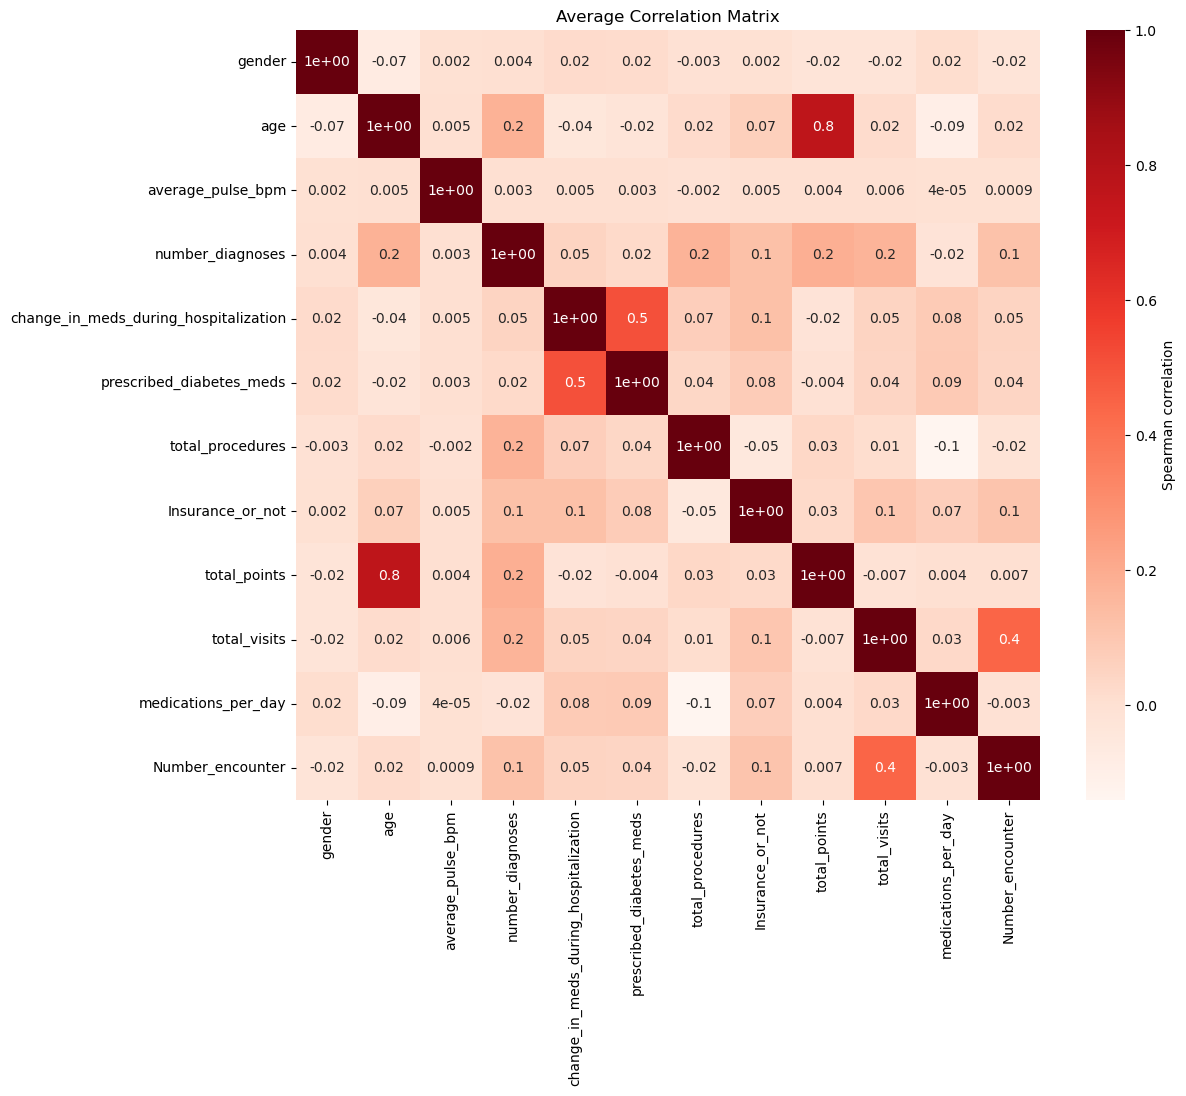

In [88]:
def cor_heatmap(cor, title="Correlation Matrix"):
    plt.figure(figsize=(12, 10))
    sns.heatmap(data=cor, annot=True, cmap=plt.cm.Reds, fmt='.1', cbar_kws={'label': 'Spearman correlation'})
    plt.title(title)
    plt.show()

cor_matrices_list = []
feature_names = X_train_num_scaled.columns 

for i, (train_index, val_index) in enumerate(skf.split(X_train_num_scaled, y_train_binary), 1):
    X_train_fold, X_val_fold = X_train_num_scaled.iloc[train_index], X_train_num_scaled.iloc[val_index]

    # Calculate correlation matrix for the training fold
    cor_matrix = X_train_fold.corr(method='spearman')

    # Append the correlation matrix to the list
    cor_matrices_list.append(cor_matrix)

# Calculate the average correlation matrix
avg_cor_matrix = np.mean(cor_matrices_list, axis=0)

# Convert the NumPy array to a DataFrame
avg_cor_matrix = pd.DataFrame(avg_cor_matrix, index=feature_names, columns=feature_names)

# Plot the average correlation matrix
cor_heatmap(avg_cor_matrix, title="Average Correlation Matrix")

### 3.4.2 Wrapper Methods

#### RFE with Logistic Regression

In [142]:
# nof_list = np.arange(4,df_selection.shape[1])

# # Variables to store the optimum features
# nof = 0
# high_score = 0

# # Lists to store training and validation scores
# train_score_list = []
# val_score_list = []

# # Initialize StratifiedKFold for cross-validation
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# for n in range(len(nof_list)):
#     model = LogisticRegression()
#     rfe = RFE(estimator=model, n_features_to_select=nof_list[n])

#     # Lists to store scores for each fold
#     fold_train_scores = []
#     fold_val_scores = []

#     for train_index, val_index in skf.split(X_train_num_scaled, y_train_binary):
#         X_train_fold, X_val_fold = X_train_num_scaled.iloc[train_index], X_train_num_scaled.iloc[val_index]
#         y_train_fold, y_val_fold = y_train_binary.iloc[train_index], y_train_binary.iloc[val_index]

#         X_train_rfe = rfe.fit_transform(X_train_fold, y_train_fold)
#         X_val_rfe = rfe.transform(X_val_fold)

#         model.fit(X_train_rfe, y_train_fold)

#         # Store results on training data
#         fold_train_score = model.score(X_train_rfe, y_train_fold)
#         fold_train_scores.append(fold_train_score)

#         # Store results on validation data
#         fold_val_score = model.score(X_val_rfe, y_val_fold)
#         fold_val_scores.append(fold_val_score)

#     # Calculate average scores for this number of features
#     avg_train_score = np.mean(fold_train_scores)
#     avg_val_score = np.mean(fold_val_scores)

#     train_score_list.append(avg_train_score)
#     val_score_list.append(avg_val_score)

#     # Check for the best score
#     if avg_val_score >= high_score:
#         high_score = avg_val_score
#         nof = nof_list[n]

# # Fit the model with the optimum number of features
# model = LogisticRegression()
# rfe = RFE(estimator=model, n_features_to_select=nof)
# X_train_rfe = rfe.fit_transform(X_train_num_scaled, y_train_binary)
# model.fit(X_train_rfe, y_train_binary)

# # Storing selected features
# selected_features_lg = pd.Series(rfe.support_, index=X_train_num_scaled.columns)

# print("Optimum number of features:", nof)
# print("Average Score with %d features:" % nof, high_score)
# print(f"Features to select:\n{selected_features_lg}")

In [71]:
selected_features_lg = ['age', 'number_diagnoses', 'total_visits','Number_encounter' ]

#### RFE with Decisions Trees

In [144]:
# nof_list = np.arange(4,df_selection.shape[1])

# # Variables to store the optimum features
# nof = 0
# high_score = 0

# # Lists to store training and validation scores
# train_score_list = []
# val_score_list = []

# # Initialize StratifiedKFold for cross-validation
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# for n in range(len(nof_list)):
#     model = LogisticRegression()
#     rfe = RFE(estimator=model, n_features_to_select=nof_list[n])

#     # Lists to store scores for each fold
#     fold_train_scores = []
#     fold_val_scores = []

#     for train_index, val_index in skf.split(X_train_num_scaled, y_train_binary):
#         X_train_fold, X_val_fold = X_train_num_scaled.iloc[train_index], X_train_num_scaled.iloc[val_index]
#         y_train_fold, y_val_fold = y_train_binary.iloc[train_index], y_train_binary.iloc[val_index]

#         X_train_rfe = rfe.fit_transform(X_train_fold, y_train_fold)
#         X_val_rfe = rfe.transform(X_val_fold)

#         model.fit(X_train_rfe, y_train_fold)

#         # Store results on training data
#         fold_train_score = model.score(X_train_rfe, y_train_fold)
#         fold_train_scores.append(fold_train_score)

#         # Store results on validation data
#         fold_val_score = model.score(X_val_rfe, y_val_fold)
#         fold_val_scores.append(fold_val_score)

#     # Calculate average scores for this number of features
#     avg_train_score = np.mean(fold_train_scores)
#     avg_val_score = np.mean(fold_val_scores)

#     train_score_list.append(avg_train_score)
#     val_score_list.append(avg_val_score)

#     # Check for the best score
#     if avg_val_score >= high_score:
#         high_score = avg_val_score
#         nof = nof_list[n]

# # Fit the model with the optimum number of features
# model = DecisionTreeClassifier()
# rfe = RFE(estimator=model, n_features_to_select=nof)
# X_train_rfe = rfe.fit_transform(X_train_num_scaled, y_train_binary)
# model.fit(X_train_rfe, y_train_binary)

# # Storing selected features
# selected_features_dt = pd.Series(rfe.support_, index=X_train_num_scaled.columns)

# print("Optimum number of features:", nof)
# print("Average Score with %d features:" % nof, high_score)
# print(f"Features to select:\n{selected_features_dt}")

In [70]:
selected_features_dt = ['age','total_procedures', 'total_points', 'medications_per_day' ]

### 3.4.3 Embebed Methods

#### Lasso

In [145]:
# def plot_importance(coef,name):
#     imp_coef = coef.sort_values()
#     plt.figure(figsize=(8,10))
#     imp_coef.plot(kind = "barh")
#     plt.title("Feature importance using " + name + " Model")
#     plt.show()

In [146]:
# def plot_importance(coef, names, model_type, title="Feature Importance"):
#     imp_coef = pd.Series(coef, index=names)
#     imp_coef = imp_coef.sort_values()
    
#     plt.figure(figsize=(8, 10))
#     imp_coef.plot(kind="barh")
#     plt.title(f"{title} using {model_type} Model")
#     plt.show()

# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# reg = LassoCV()
# # Lists to store selected features for each fold
# selected_features_list = []

# for train_index, val_index in skf.split(X_train_num_scaled, y_train_binary):
#     X_train_fold, X_val_fold = X_train_num_scaled.iloc[train_index], X_train_num_scaled.iloc[val_index]
#     y_train_fold, y_val_fold = y_train_binary.iloc[train_index], y_train_binary.iloc[val_index]

#     reg.fit(X_train_fold, y_train_fold)
#     coef_fold = pd.Series(reg.coef_, index=X_train_fold.columns)
#     selected_features_fold = coef_fold[coef_fold != 0].index
#     selected_features_list.append(selected_features_fold)

# # Combine selected features from all folds
# selected_feat_lasso = set.intersection(*map(set, selected_features_list))

# # Display results
# print('Total features: {}'.format(X_train_num_scaled.shape[1]))
# print('Selected features across all folds: {}'.format(len(selected_feat_lasso)))
# print('Variables eliminated by Lasso: {}'.format(sum(reg.coef_ == 0)))
# print('Selected features:', selected_feat_lasso)

# # Plotting the feature importance
# plot_importance(reg.coef_, X_train_num_scaled.columns, 'Lasso', title='Lasso Feature Importance')


In [69]:
selected_feat_lasso = ['age', 'number_diagnoses', 'Number_encounter', 'change_in_meds_during_hospitalization', 'medications_per_day', 'total_visits', 'prescribed_diabetes_meds', 'total_procedures', 'Insurance_or_not']

#### Ridge

In [233]:

# sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2', solver='liblinear'))

# selected_features_list = []

# for train_index, val_index in skf.split(X_train_num_scaled, y_train_binary):
#     X_train_fold, X_val_fold = X_train_num_scaled.iloc[train_index], X_train_num_scaled.iloc[val_index]
#     y_train_fold, y_val_fold = y_train_binary.iloc[train_index], y_train_binary.iloc[val_index]

#     sel_.fit(X_train_fold, np.ravel(y_train_fold, order='C'))
#     selected_features_fold = X_train_num_scaled.columns[(sel_.get_support())]
#     selected_features_list.append(selected_features_fold)

# # Combine selected features from all folds
# selected_feat_ridge = set.intersection(*map(set, selected_features_list))

# print('Total features: {}'.format(X_train_num_scaled.shape[1]))
# print('Selected features across all folds: {}'.format(len(selected_feat_ridge)))
# print('Features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))
# print('Selected features:', selected_feat_ridge)

In [68]:
selected_feat_ridge = ['total_visits', 'Number_encounter']

#### Decision Tree

<Axes: xlabel='Value', ylabel='Col'>

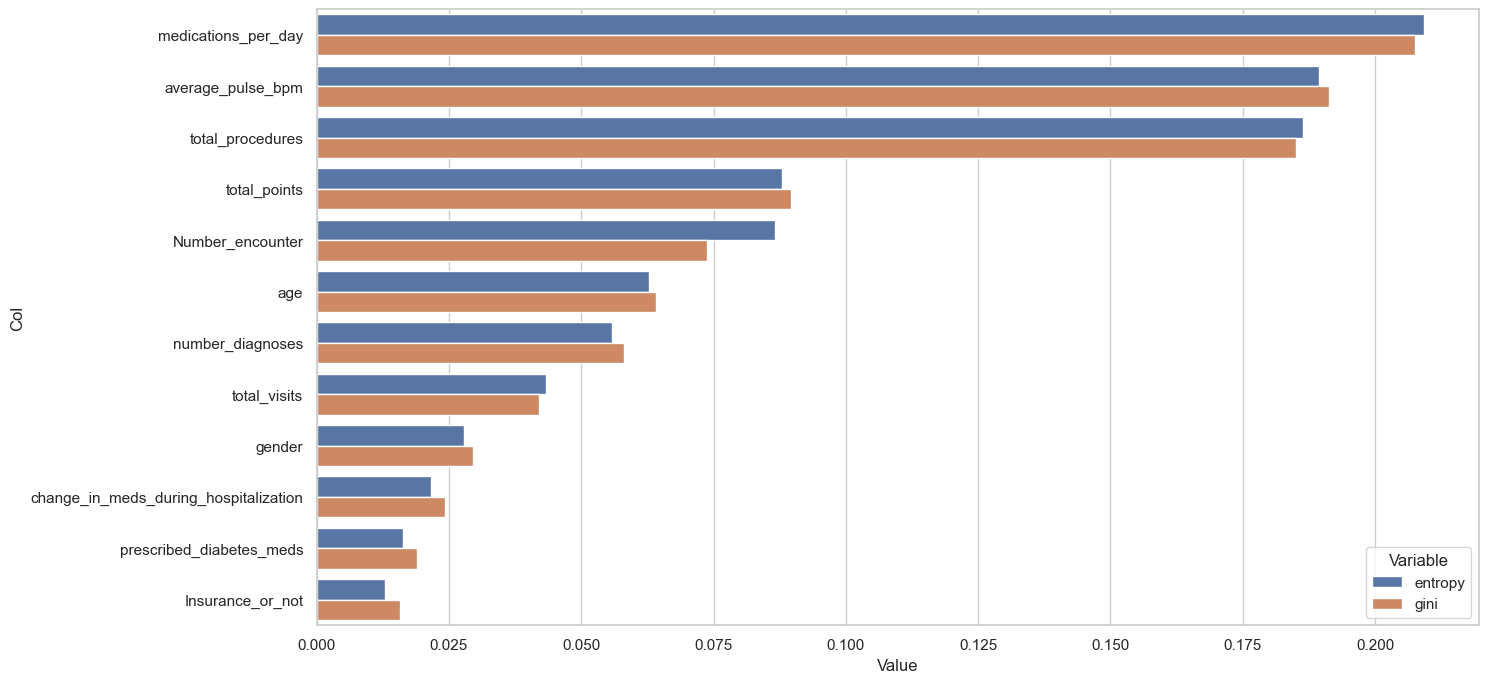

In [93]:
sns.set(style="whitegrid")

gini_importance = DecisionTreeClassifier().fit(X_train_num_scaled, y_train_binary).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train_num_scaled, y_train_binary).feature_importances_

zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train_num_scaled.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

#### ANOVA

In [66]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
k_best = SelectKBest(score_func=f_classif)

# Lists to store selected features for each fold
selected_features_list = []

for train_index, val_index in skf.split(X_train_num_scaled, y_train_binary):
    X_train_fold, X_val_fold = X_train_num_scaled.iloc[train_index], X_train_num_scaled.iloc[val_index]
    y_train_fold, y_val_fold = y_train_binary.iloc[train_index], y_train_binary.iloc[val_index]

    # Set k to the desired number of features
    k_best.k = min(4, X_train_fold.shape[1])  

    # Fit and transform the training data
    X_train_fold_selected = k_best.fit_transform(X_train_fold, y_train_fold)

    # Get the selected features and store them
    selected_features_fold = X_train_fold.columns[k_best.get_support()]
    selected_features_list.append(selected_features_fold)

# Combine selected features from all folds
selected_feat_anova = set.intersection(*map(set, selected_features_list))

# Display results
print('Total features: {}'.format(X_train_num_scaled.shape[1]))
print('Selected features across all folds: {}'.format(len(selected_feat_anova)))
print('Selected features:', selected_feat_anova)

Total features: 12
Selected features across all folds: 4
Selected features: {'Number_encounter', 'number_diagnoses', 'prescribed_diabetes_meds', 'total_visits'}


In [67]:
selected_feat_anova = ['Number_encounter', 'number_diagnoses', 'prescribed_diabetes_meds', 'total_visits']

## 3.5 Decisions

In [72]:
df_models = pd.concat([X_train_num_scaled, X_train_cat], axis=1)
df_models_val =  pd.concat([X_val_num_scaled, X_val_cat], axis=1)
df_models_test =  pd.concat([X_test_num_scaled, X_test_cat], axis=1)

In [73]:
selected_features_data = []

rfe_lg = selected_features_lg
rfe_dt = selected_features_dt
lasso_features = selected_feat_lasso
ridge_features = selected_feat_ridge
anova_features = selected_feat_anova

dt_features = ['average_pulse_bpm', 'medications_per_day', 'Number_encounter', 'total_points', 'number_diagnoses', 'age', 'total_procedures']
corr_matrix = ['gender', 'age','average_pulse_bpm',  'number_diagnoses', 'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds', 'total_procedures', 'Insurance_or_not','total_points','total_visits', 'medications_per_day', 'Number_encounter']

for feature in X_train_num_scaled.columns:
    rfe_logistic = 'Discard'
    rfe_decision_tree = 'Discard'
    lasso = 'Discard'  
    ridge = 'Discard'  
    dt = 'Discard'
    anova = 'Discard'

    if feature in rfe_lg:
        rfe_logistic = 'Keep'

    if feature in rfe_dt:
        rfe_decision_tree = 'Keep'

    if feature in lasso_features:
        lasso = 'Keep'

    if feature in ridge_features:
        ridge = 'Keep'
    
    if feature in dt_features:
        dt = 'Keep'

    if feature in anova_features:
        anova = 'Keep'
    
    discard_count = [rfe_logistic, rfe_decision_tree, lasso, ridge, dt, anova].count('Discard')
    decision = 'Discard' if discard_count > 3 else 'Keep'

    # Append the result to the selected_features_data list
    selected_features_data.append({'Feature': feature,'RFE Logistic':rfe_logistic ,'RFE DT' : rfe_decision_tree,'Lasso': lasso, 'Ridge': ridge, 'Decision Tree': dt, 'ANOVA': anova, 'Decision': decision})

# Create a DataFrame from the list of results
selected_features_df = pd.DataFrame(selected_features_data)

# Print the resulting DataFrame 
selected_features_df

Feature RFE Logistic   RFE DT    Lasso  \
0                                  gender      Discard  Discard  Discard   
1                                     age         Keep     Keep     Keep   
2                       average_pulse_bpm      Discard  Discard  Discard   
3                        number_diagnoses         Keep  Discard     Keep   
4   change_in_meds_during_hospitalization      Discard  Discard     Keep   
5                prescribed_diabetes_meds      Discard  Discard     Keep   
6                        total_procedures      Discard     Keep     Keep   
7                        Insurance_or_not      Discard  Discard     Keep   
8                            total_points      Discard     Keep  Discard   
9                            total_visits         Keep  Discard     Keep   
10                    medications_per_day      Discard     Keep     Keep   
11                       Number_encounter         Keep  Discard     Keep   

      Ridge Decision Tree    ANOVA Decision  
0   Discard       Discard  Discard  Discard  
1   Discard          Keep  Discard     Keep  
2   Discard          Keep  Discard  Discard  
3   Discard          Keep     Keep     Keep  
4   Discard       Discard  Discard  Discard  
5   Discard       Discard     Keep  Discard  
6   Discard          Keep  Discard     Keep  
7   Discard       Discard  Discard  Discard  
8   Discard          Keep  Discard  Discard  
9      Keep       Discard     Keep     Keep  
10  Discard          Keep  Discard     Keep  
11     Keep          Keep     Keep     Keep

In [74]:
X_train_new = df_models.drop(['gender', 'average_pulse_bpm', 'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds', 'Insurance_or_not','total_points', 'admission_source', 'new_medications'], axis=1)
X_val_new = df_models_val.drop(['gender', 'average_pulse_bpm', 'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds', 'Insurance_or_not','total_points', 'admission_source', 'new_medications'], axis=1)
X_test = df_models_test.drop(['gender', 'average_pulse_bpm', 'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds', 'Insurance_or_not', 'total_points','admission_source', 'new_medications'], axis=1)

In [75]:
X_train_new.shape

(56988, 10)

# 4. Modeling

## Binary Target

In [76]:
y_train_binary.value_counts(normalize=True)

readmitted_binary
0    0.887748
1    0.112252
Name: proportion, dtype: float64

## 4.1 Over Sampling

In [89]:
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_new, y_train_binary)
print(len(X_train_oversampled), len(y_train_oversampled))

101182 101182


### 4.1.1 Model Selection

In [159]:
# def evaluate_models(X_train, X_val, y_train, y_val, models):
#     timer = []
#     metrics = {
#         'time': [],
#         'train_f1': [],
#         'val_f1': [],
#         'precision': [],
#         'recall': [],
#     }

#     for model_name, model in models.items():
#         # Train the model
#         begin = time.perf_counter()
#         model.fit(X_train, y_train)
#         end = time.perf_counter()

#         # Make predictions on training and validation sets
#         y_train_pred = model.predict(X_train)
#         y_val_pred = model.predict(X_val)

#         # Calculate precision, recall, and F1 scores
#         train_f1 = f1_score(y_train, y_train_pred)
#         val_f1 = f1_score(y_val, y_val_pred)
#         precision = precision_score(y_val, y_val_pred)
#         recall = recall_score(y_val, y_val_pred)

#         metrics['time'].append(end - begin)
#         metrics['train_f1'].append(train_f1)
#         metrics['val_f1'].append(val_f1)
#         metrics['precision'].append(precision)
#         metrics['recall'].append(recall)

#     avg_time = np.mean(metrics['time'])
#     avg_train_f1 = np.mean(metrics['train_f1'])
#     avg_val_f1 = np.mean(metrics['val_f1'])
#     avg_precision = np.mean(metrics['precision'])
#     avg_recall = np.mean(metrics['recall'])

#     std_time = np.std(metrics['time'])
#     std_train_f1 = np.std(metrics['train_f1'])
#     std_val_f1 = np.std(metrics['val_f1'])
#     std_precision = np.std(metrics['precision'])
#     std_recall = np.std(metrics['recall'])

#     return avg_time, avg_train_f1, avg_val_f1, avg_precision, avg_recall, std_time, std_train_f1, std_val_f1, std_precision, std_recall

# def show_results(df, X_train, X_val, y_train, y_val, models):
#     count = 0

#     for model_name, model in models.items():
#         avg_time, avg_train_f1, avg_val_f1, avg_precision, avg_recall, std_time, std_train_f1, std_val_f1, std_precision, std_recall = evaluate_models(X_train, X_val, y_train, y_val, {model_name: model})

#         # Ensure the DataFrame has enough rows
#         if count >= len(df):
#             df.loc[df.shape[0]] = [np.nan] * df.shape[1]

#         # Calculate overfitting
#         overfitting = avg_train_f1 - avg_val_f1

#         # Assign values to the DataFrame
#         df.iloc[count] = f"{avg_time:.3f}+/-{std_time:.2f}", f"{avg_train_f1:.3f}+/-{std_train_f1:.2f}", f"{avg_val_f1:.3f}+/-{std_val_f1:.2f}", f"{overfitting:.3f}", f"{avg_precision:.3f}+/-{std_precision:.2f}", f"{avg_recall:.3f}+/-{std_recall:.2f}"
#         count += 1

#     return df


# models_to_evaluate = {
#     'LogisticRegression': LogisticRegression(),
#     'KNeighborsClassifier': KNeighborsClassifier(),
#     'DecisionTreeClassifier': DecisionTreeClassifier(),
#     'MLPClassifier': MLPClassifier(),
#     'GaussianNB': GaussianNB(),
# }

# df_all = pd.DataFrame(
#     columns=['Time', 'Train_F1', 'Validation_F1', 'Overfitting', 'Precision', 'Recall'],
#     index=list(models_to_evaluate.keys())
# )

# show_results(df_all, X_train_oversampled, X_val_new, y_train_oversampled, y_val_binary, models_to_evaluate)


### 4.1.2 Models Optimization

#### KNN

In [263]:
# sns.set(style="whitegrid")
# k_range = range(1, 20)

# scores = []

# for k in k_range:
#     k = int(k)
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train_oversampled, y_train_oversampled)
#     y_pred = knn.predict(X_val_new)
#     scores.append(accuracy_score(y_val_binary, y_pred))

# plt.plot(k_range, scores)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Validation Accuracy')
# plt.show()

# best_index = np.argmax(scores)
# best_n_estimators = list(k_range)[best_index]
# print(f'The best value for n_neighbor is {best_n_estimators} with accuracy {scores[best_index]:.2f}')

In [264]:
# knn_model = KNeighborsClassifier()

# # Define the hyperparameter grid
# param_grid = {
#     'n_neighbors': [2],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
# }

# grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='f1', n_jobs=-1)

# # Fit the grid search to the data
# grid_search.fit(X_train_oversampled, y_train_oversampled)

# # Get the best parameters from the grid search
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Use the best model to make predictions
# best_knn_model = grid_search.best_estimator_
# y_pred_knn = best_knn_model.predict(X_val_new)

In [78]:
best_knn_oversample = KNeighborsClassifier(n_neighbors=2, weights='distance', p=1, algorithm='auto')
best_knn_oversample.fit(X_train_oversampled, y_train_oversampled)

y_train_knn_oversample = best_knn_oversample.predict(X_train_oversampled)
y_pred_knn_oversample = best_knn_oversample.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_oversampled, y_train_knn_oversample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_knn_oversample))
print('kaggle result:0.1547 version59' )


F1 Score to the Train dataset: 0.9993670760893214
F1 Score to the Validation dataset: 0.14974293059125965
kaggle result:0.1547 version59


#### Logistic Regression

In [266]:
# lr_model = LogisticRegression(max_iter=1000)

# # Define the hyperparameter grid
# param_grid = {
#     'solver' :['sag', 'saga'],
#     'penalty': ['l1','l2'],
#     "C":np.logspace(-3,3,7)
# }

# random_search = RandomizedSearchCV(lr_model, param_grid, cv=10, scoring='f1', n_jobs=-1)

# # Fit the grid search to the data
# random_search.fit(X_train_oversampled, y_train_oversampled)

# # Get the best parameters from the grid search
# best_params = random_search.best_params_
# print("Best Parameters:", best_params)

In [79]:
best_lg_oversample = LogisticRegression(solver = 'saga', penalty= 'l1', C= 10.0)
best_lg_oversample.fit(X_train_oversampled, y_train_oversampled)

y_train_lg_oversample = best_lg_oversample.predict(X_train_oversampled)
y_pred_lg_oversample = best_lg_oversample.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_oversampled, y_train_lg_oversample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_lg_oversample))
print('kaggle result: 0.266 version 60' )


F1 Score to the Train dataset: 0.6030724562315826
F1 Score to the Validation dataset: 0.231085327532028
kaggle result: 0.266 version 60


#### Decision Trees

In [268]:
# sns.set(style="whitegrid")
# #AUC
# def calculate_AUC(interval, x_train, x_val, y_train, y_val, parameter, max_depth = None):
#     train_results = []
#     val_results = []
#     for value in interval:
#         if (parameter == 'max_depth'):          
#             dt = DecisionTreeClassifier(max_depth = value, random_state=42)
#             dt.fit(x_train, y_train)
#         elif (parameter == 'max_features'):  
#             dt = DecisionTreeClassifier(max_features = value, max_depth = max_depth, random_state=42)
#             dt.fit(x_train, y_train)
#         elif (parameter == 'min_samples_split'):  
#             dt = DecisionTreeClassifier(min_samples_split = value, max_depth = max_depth, random_state=42)
#             dt.fit(x_train, y_train)
#         elif (parameter == 'min_samples_leaf'):  
#             dt = DecisionTreeClassifier(min_samples_leaf = value, max_depth = max_depth, random_state=42)
#             dt.fit(x_train, y_train)
#         elif (parameter == 'criterion'):
#             dt = DecisionTreeClassifier(criterion = value, max_depth = max_depth, random_state=42)
#             dt.fit(x_train, y_train)
#         elif (parameter == 'splitter'):
#             dt = DecisionTreeClassifier(splitter = value, max_depth = max_depth, random_state=42)
#             dt.fit(x_train, y_train)

#         train_pred = dt.predict(x_train)
#         false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#         roc_auc = auc(false_positive_rate, true_positive_rate)
#         # Add auc score to previous train results
#         train_results.append(roc_auc)
#         y_pred = dt.predict(x_val)
#         false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
#         roc_auc = auc(false_positive_rate, true_positive_rate)
#         # Add auc score to previous validation results
#         val_results.append(roc_auc)
#     value_train = train_results.index(max(train_results))
#     value_val = val_results.index(max(val_results))
#     print('The best train value is ',interval[value_train])
#     print('The best validation value is ',interval[value_val])
    


#     line1, = plt.plot(interval, train_results, 'b', label="Train AUC")
#     line2, = plt.plot(interval, val_results, 'r', label="Validation AUC")
#     plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
#     plt.ylabel("AUC score")
#     plt.xlabel(str(parameter))
#     plt.show()

In [269]:
# max_depths = np.linspace(1, 15, 15, endpoint=True).astype(int)
# calculate_AUC(max_depths, X_train_oversampled, X_val_new, y_train_oversampled, y_val_binary, 'max_depth')


In [270]:
# max_features = list(range(1,len(X_train_oversampled.columns)))
# calculate_AUC(max_features, X_train_oversampled, X_val_new, y_train_oversampled, y_val_binary,'max_features', 10)

In [271]:
# min_samples_split = list(range(10,201))
# calculate_AUC(min_samples_split, X_train_oversampled, X_val_new, y_train_oversampled, y_val_binary,'min_samples_split', 10)

In [272]:
# min_samples_leaf = list(range(10,201))
# calculate_AUC(min_samples_leaf, X_train_oversampled, X_val_new, y_train_oversampled, y_val_binary, 'min_samples_leaf', 10)

In [273]:
# criteria = ['gini', 'entropy']
# calculate_AUC(criteria, X_train_oversampled, X_val_new, y_train_oversampled, y_val_binary, 'criterion')

In [274]:
# splitter = ['best', 'random']
# calculate_AUC(splitter, X_train_oversampled, X_val_new, y_train_oversampled, y_val_binary, 'splitter')

In [80]:
best_dt_oversample = DecisionTreeClassifier(max_depth=1, min_samples_leaf=188, min_samples_split=23, random_state=42)
best_dt_oversample.fit(X_train_oversampled, y_train_oversampled)

y_train_dt_oversample = best_dt_oversample.predict(X_train_oversampled)
y_pred_dt_oversample = best_dt_oversample.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_oversampled, y_train_dt_oversample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_dt_oversample))
print('kaggle result: 0.3104 version 61' )


F1 Score to the Train dataset: 0.7196495740545559
F1 Score to the Validation dataset: 0.25962348974431015
kaggle result: 0.3104 version 61


#### Neural Networks

##### Random Search

In [276]:
# parameter_space_grid = {
#     'hidden_layer_sizes': [4,6,(6,6),8,(50,),(50,50),(100,100)],
#     'learning_rate_init': [0.001,0.0015, 0.01, 0.015, 0.1],
#     'learning_rate': ['constant', 'adaptive'],
#     'solver': [ 'adam', 'sgd'],
#     'activation': ['relu', 'logistic', 'tanh'],
# }

# nn = MLPClassifier(max_iter = 100, random_state = 42)
# random_search = RandomizedSearchCV(nn, parameter_space_grid, cv=10, scoring='f1', n_jobs=-1)
# random_search.fit(X_train_oversampled, y_train_oversampled)

# best_params = random_search.best_params_
# print("Best Parameters:", best_params)

In [81]:
best_nn_oversample = MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.015, learning_rate='adaptive', solver='adam', activation='relu', max_iter=200, random_state=42)
best_nn_oversample.fit(X_train_oversampled, y_train_oversampled)

y_train_nn_oversample = best_nn_oversample.predict(X_train_oversampled)
y_pred_nn_oversample = best_nn_oversample.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_oversampled, y_train_nn_oversample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_nn_oversample))
print('kaggle result:0.287 version 52' )


F1 Score to the Train dataset: 0.7444647424187066
F1 Score to the Validation dataset: 0.2666942319619599
kaggle result:0.287 version 52


#### Naive Bayes

In [278]:
# nb = GaussianNB()
# param_grid = {
#     'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
# }

# grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='f1', n_jobs=-1)
# grid_search.fit(X_train_oversampled, y_train_oversampled)

# # Get the best parameters from the grid search
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

In [82]:
best_nb_oversample =GaussianNB(var_smoothing = 1e-09)
best_nb_oversample.fit(X_train_oversampled, y_train_oversampled)

y_train_nb_oversample = best_nb_oversample.predict(X_train_oversampled)
y_pred_nb_oversample = best_nb_oversample.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_oversampled, y_train_nb_oversample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_nb_oversample))
print('kaggle result: 0.2505 version 63' )


F1 Score to the Train dataset: 0.5432971413341986
F1 Score to the Validation dataset: 0.22828459188127456
kaggle result: 0.2505 version 63


### Results with improved models 

In [160]:

# models_to_evaluate = {
#     'LogisticRegression': LogisticRegression(solver = 'saga', penalty= 'l1', C= 10.0),
#     'KNeighborsClassifier':  KNeighborsClassifier(n_neighbors=2, weights='distance', p=1, algorithm='auto'),
#     'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, min_samples_leaf=188, min_samples_split=23, random_state=42),
#     'MLPClassifier': MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.015, learning_rate='adaptive', solver='adam', activation='relu', max_iter=200, random_state=42),
#     'GaussianNB': GaussianNB(var_smoothing = 1e-09),
# }

# df_all = pd.DataFrame(
#     columns=['Time', 'Train_F1', 'Validation_F1', 'Overfitting', 'Precision', 'Recall'],
#     index=list(models_to_evaluate.keys())
# )

# show_results(df_all, X_train_oversampled, X_val_new, y_train_oversampled, y_val_binary, models_to_evaluate)


### ROC Curve

In [161]:
# final_model_lr_over = LogisticRegression(solver = 'saga', penalty= 'l1', C= 10.0)
# final_model_knn_over = KNeighborsClassifier(n_neighbors=2, weights='distance', p=1, algorithm='auto')
# final_model_dt_over = DecisionTreeClassifier(max_depth=1, min_samples_leaf=188, min_samples_split=23, random_state=42)
# final_model_nn_over = MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.015, learning_rate='adaptive', solver='adam', activation='relu', max_iter=200, random_state=42)
# final_model_gb_over = GaussianNB(var_smoothing = 1e-09)

In [162]:
# model_lr = final_model_lr_over.fit(X_train_oversampled, y_train_oversampled)
# model_knn = final_model_knn_over.fit(X_train_oversampled, y_train_oversampled)
# model_dt = final_model_dt_over.fit(X_train_oversampled, y_train_oversampled)
# model_gb = final_model_gb_over.fit(X_train_oversampled, y_train_oversampled)
# model_nn = final_model_nn_over.fit(X_train_oversampled, y_train_oversampled)

In [163]:
# prob_modelLR = model_lr.predict_proba(X_val_new)
# prob_modelKNN = model_knn.predict_proba(X_val_new)
# prob_modelDT =  model_dt.predict_proba(X_val_new)
# prob_modelGB =  model_gb.predict_proba(X_val_new)
# prob_modelNN =  model_nn.predict_proba(X_val_new)

In [164]:
# fpr_modelLR, tpr_modelLR, thresholds_modelLR = roc_curve(y_val_binary, prob_modelLR[:,1])
# fpr_modelKNN, tpr_modelKNN, thresholds_modelKNN = roc_curve(y_true = y_val_binary, y_score = prob_modelKNN[:,1])
# fpr_modelDT, tpr_modelDT, thresholds_modelDT = roc_curve(y_val_binary, prob_modelDT[:,1])
# fpr_modelGB, tpr_modelGB, thresholds_modelGB = roc_curve(y_val_binary, prob_modelGB[:,1])
# fpr_modelNN, tpr_modelNN, thresholds_modelNN = roc_curve(y_val_binary, prob_modelNN[:,1])

In [165]:
# plt.plot(fpr_modelLR, tpr_modelLR,label="ROC Curve LR")
# plt.plot(fpr_modelKNN, tpr_modelKNN,label="ROC Curve KNN")
# plt.plot(fpr_modelDT, tpr_modelDT, label="ROC Curve DT")
# plt.plot(fpr_modelGB, tpr_modelGB, label="ROC Curve GB")
# plt.plot(fpr_modelNN, tpr_modelNN, label="ROC Curve NN")
# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.legend()
# plt.show()

## 4.2 Under Sampling

In [97]:
def undersample(X, y, ratio=1.0, random_state=None):
    sampler = RandomUnderSampler(sampling_strategy=ratio, random_state=random_state)
    X_resampled, y_resampled = sampler.fit_resample(X, y)
    return X_resampled, y_resampled

X_train_undersampled, y_train_undersampled = undersample(X_train_new, y_train_binary)
len(X_train_undersampled), len(y_train_undersampled)

(12794, 12794)

### 4.2.1 Model Selection

In [166]:
# def evaluate_models(X_train, X_val, y_train, y_val, models):
#     timer = []
#     metrics = {
#         'time': [],
#         'train_f1': [],
#         'val_f1': [],
#         'precision': [],
#         'recall': [],
#     }

#     for model_name, model in models.items():
#         # Train the model
#         begin = time.perf_counter()
#         model.fit(X_train, y_train)
#         end = time.perf_counter()

#         # Make predictions on training and validation sets
#         y_train_pred = model.predict(X_train)
#         y_val_pred = model.predict(X_val)

#         # Calculate precision, recall, and F1 scores
#         train_f1 = f1_score(y_train, y_train_pred)
#         val_f1 = f1_score(y_val, y_val_pred)
#         precision = precision_score(y_val, y_val_pred)
#         recall = recall_score(y_val, y_val_pred)

#         metrics['time'].append(end - begin)
#         metrics['train_f1'].append(train_f1)
#         metrics['val_f1'].append(val_f1)
#         metrics['precision'].append(precision)
#         metrics['recall'].append(recall)

#     avg_time = np.mean(metrics['time'])
#     avg_train_f1 = np.mean(metrics['train_f1'])
#     avg_val_f1 = np.mean(metrics['val_f1'])
#     avg_precision = np.mean(metrics['precision'])
#     avg_recall = np.mean(metrics['recall'])

#     std_time = np.std(metrics['time'])
#     std_train_f1 = np.std(metrics['train_f1'])
#     std_val_f1 = np.std(metrics['val_f1'])
#     std_precision = np.std(metrics['precision'])
#     std_recall = np.std(metrics['recall'])

#     return avg_time, avg_train_f1, avg_val_f1, avg_precision, avg_recall, std_time, std_train_f1, std_val_f1, std_precision, std_recall

# def show_results(df, X_train, X_val, y_train, y_val, models):
#     count = 0

#     for model_name, model in models.items():
#         avg_time, avg_train_f1, avg_val_f1, avg_precision, avg_recall, std_time, std_train_f1, std_val_f1, std_precision, std_recall = evaluate_models(X_train, X_val, y_train, y_val, {model_name: model})

#         # Ensure the DataFrame has enough rows
#         if count >= len(df):
#             df.loc[df.shape[0]] = [np.nan] * df.shape[1]

#         # Calculate overfitting
#         overfitting = avg_train_f1 - avg_val_f1

#         # Assign values to the DataFrame
#         df.iloc[count] = f"{avg_time:.3f}+/-{std_time:.2f}", f"{avg_train_f1:.3f}+/-{std_train_f1:.2f}", f"{avg_val_f1:.3f}+/-{std_val_f1:.2f}", f"{overfitting:.3f}", f"{avg_precision:.3f}+/-{std_precision:.2f}", f"{avg_recall:.3f}+/-{std_recall:.2f}"
#         count += 1

#     return df


# models_to_evaluate = {
#     'LogisticRegression': LogisticRegression(),
#     'KNeighborsClassifier': KNeighborsClassifier(),
#     'DecisionTreeClassifier': DecisionTreeClassifier(),
#     'MLPClassifier': MLPClassifier(),
#     'GaussianNB': GaussianNB(),
# }

# df_all = pd.DataFrame(
#     columns=['Time', 'Train_F1', 'Validation_F1', 'Overfitting', 'Precision', 'Recall'],
#     index=list(models_to_evaluate.keys())
# )

# show_results(df_all, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, models_to_evaluate)


Time      Train_F1 Validation_F1 Overfitting  \
LogisticRegression       0.121+/-0.00  0.592+/-0.00  0.233+/-0.00       0.359   
KNeighborsClassifier     0.030+/-0.00  0.729+/-0.00  0.207+/-0.00       0.522   
DecisionTreeClassifier   0.093+/-0.00  0.999+/-0.00  0.212+/-0.00       0.787   
MLPClassifier           23.155+/-0.00  0.696+/-0.00  0.273+/-0.00       0.423   
GaussianNB               0.005+/-0.00  0.448+/-0.00  0.191+/-0.00       0.258   

                           Precision        Recall  
LogisticRegression      0.205+/-0.00  0.272+/-0.00  
KNeighborsClassifier    0.139+/-0.00  0.406+/-0.00  
DecisionTreeClassifier  0.136+/-0.00  0.484+/-0.00  
MLPClassifier           0.187+/-0.00  0.505+/-0.00  
GaussianNB              0.202+/-0.00  0.180+/-0.00

### 4.2.2 Models Optimization

#### KNN

In [288]:
# sns.set(style="whitegrid")
# k_range = range(1, 20)

# scores = []

# for k in k_range:
#     k = int(k)
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train_undersampled, y_train_undersampled)
#     y_pred = knn.predict(X_val_new)
#     scores.append(accuracy_score(y_val_binary, y_pred))

# plt.plot(k_range, scores)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Validation Accuracy')
# plt.show()

# best_index = np.argmax(scores)
# best_n_estimators = list(k_range)[best_index]
# print(f'The best value for n_neighbors is {best_n_estimators} with accuracy {scores[best_index]:.2f}')

In [289]:
# knn_model = KNeighborsClassifier()

# # Define the hyperparameter grid
# param_grid = {
#     'n_neighbors': [2],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
# }

# grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='f1', n_jobs=-1)

# # Fit the grid search to the data
# grid_search.fit(X_train_undersampled, y_train_undersampled)

# # Get the best parameters from the grid search
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Use the best model to make predictions
# best_knn_model = grid_search.best_estimator_
# y_pred_knn = best_knn_model.predict(X_val_new)


In [84]:
best_knn_undersample = KNeighborsClassifier(n_neighbors=2, weights='distance', p=2 , algorithm='auto')
best_knn_undersample.fit(X_train_undersampled, y_train_undersampled)

y_train_knn_undersample = best_knn_undersample.predict(X_train_undersampled)
y_pred_knn_undersample = best_knn_undersample.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_undersampled, y_train_knn_undersample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_knn_undersample))
print('kaggle result:0.2049 version 38' )


F1 Score to the Train dataset: 0.9992960500586625
F1 Score to the Validation dataset: 0.20868306801736614
kaggle result:0.2049 version 38


#### Logistic Regression

In [291]:
# lr_model = LogisticRegression(max_iter=1000)

# # Define the hyperparameter grid
# param_grid = {
#     'solver' :['sag', 'saga'],
#     'penalty': ['l1','l2'],
#     "C":np.logspace(-3,3,7)
# }

# grid_search = GridSearchCV(lr_model, param_grid, cv=10, scoring='f1', n_jobs=-1)

# # Fit the grid search to the data
# grid_search.fit(X_train_undersampled, y_train_undersampled)

# # Get the best parameters from the grid search
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)


In [85]:
best_lg_undersample =LogisticRegression(solver = 'sag', penalty = 'l2', C=0.01)
best_lg_undersample.fit(X_train_undersampled, y_train_undersampled)

y_train_lg_undersample = best_lg_undersample.predict(X_train_undersampled)
y_pred_lg_undersample = best_lg_undersample.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_undersampled, y_train_lg_undersample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_lg_undersample))
print('kaggle result: 0.2439 version 39' )


F1 Score to the Train dataset: 0.5978218287236543
F1 Score to the Validation dataset: 0.22008453578195597
kaggle result: 0.2439 version 39


#### Decision Trees

In [293]:
# sns.set(style="whitegrid")
# #AUC
# def calculate_AUC(interval, x_train, x_val, y_train, y_val, parameter, max_depth = None):
#     train_results = []
#     val_results = []
#     for value in interval:
#         if (parameter == 'max_depth'):          
#             dt = DecisionTreeClassifier(max_depth = value, random_state=42)
#             dt.fit(x_train, y_train)
#         elif (parameter == 'max_features'):  
#             dt = DecisionTreeClassifier(max_features = value, max_depth = max_depth, random_state=42)
#             dt.fit(x_train, y_train)
#         elif (parameter == 'min_samples_split'):  
#             dt = DecisionTreeClassifier(min_samples_split = value, max_depth = max_depth, random_state=42)
#             dt.fit(x_train, y_train)
#         elif (parameter == 'min_samples_leaf'):  
#             dt = DecisionTreeClassifier(min_samples_leaf = value, max_depth = max_depth, random_state=42)
#             dt.fit(x_train, y_train)
#         elif (parameter == 'criterion'):
#             dt = DecisionTreeClassifier(criterion = value, max_depth = max_depth, random_state=42)
#             dt.fit(x_train, y_train)
#         elif (parameter == 'splitter'):
#             dt = DecisionTreeClassifier(splitter = value, max_depth = max_depth, random_state=42)
#             dt.fit(x_train, y_train)

#         train_pred = dt.predict(x_train)
#         false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#         roc_auc = auc(false_positive_rate, true_positive_rate)
#         # Add auc score to previous train results
#         train_results.append(roc_auc)
#         y_pred = dt.predict(x_val)
#         false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
#         roc_auc = auc(false_positive_rate, true_positive_rate)
#         # Add auc score to previous validation results
#         val_results.append(roc_auc)
#     value_train = train_results.index(max(train_results))
#     value_val = val_results.index(max(val_results))
#     print('The best train value is ',interval[value_train])
#     print('The best validation value is ',interval[value_val])
    

#     import matplotlib.pyplot as plt
#     from matplotlib.legend_handler import HandlerLine2D
#     line1, = plt.plot(interval, train_results, 'b', label="Train AUC")
#     line2, = plt.plot(interval, val_results, 'r', label="Validation AUC")
#     plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
#     plt.ylabel("AUC score")
#     plt.xlabel(str(parameter))
#     plt.show()

In [294]:
# max_depths = np.linspace(1, 15, 15, endpoint=True).astype(int)
# calculate_AUC(max_depths, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, 'max_depth')


In [295]:
# max_features = list(range(1,len(X_train_oversampled.columns)))
# calculate_AUC(max_features,X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary,'max_features', 10)

In [296]:
# min_samples_split = list(range(10,201))
# calculate_AUC(min_samples_split, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary,'min_samples_split', 10)

In [297]:
# min_samples_leaf = list(range(10,201))
# calculate_AUC(min_samples_leaf,X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, 'min_samples_leaf', 10)

In [298]:
# criteria = ['gini', 'entropy']
# calculate_AUC(criteria, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, 'criterion')

In [299]:
# splitter = ['best', 'random']
# calculate_AUC(splitter, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, 'splitter')

In [140]:
best_dt_undersample = DecisionTreeClassifier(max_depth=5, min_samples_leaf=82, min_samples_split=178, random_state=42)
best_dt_undersample.fit(X_train_undersampled, y_train_undersampled)

y_train_dt_undersample = best_dt_undersample.predict(X_train_undersampled)
y_pred_dt_undersample = best_dt_undersample.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_undersampled, y_train_dt_undersample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_dt_undersample))
print('kaggle result: 0.3016 version 70' )


F1 Score to the Train dataset: 0.6905103969754253
F1 Score to the Validation dataset: 0.27448609431680776
kaggle result: 0.3016 version 70


#### Neural Networks

In [301]:
# sns.set(style="whitegrid")
# #AUC
# def calculate_AUC(interval, x_train, x_val, y_train, y_val, parameter):
#     train_results = []
#     val_results = []
#     for value in interval:
#         if (parameter == 'solver'):          
#             nn = MLPClassifier( solver = value, random_state=42)
#             nn.fit(x_train, y_train)
#         elif (parameter == 'learning_rate'): 
#             nn =MLPClassifier( learning_rate= value, random_state=42)
#             nn.fit(x_train, y_train)
#         elif (parameter == 'activation'):
#             nn = MLPClassifier(activation = value, random_state=42)
#             nn.fit(x_train, y_train)
#         elif (parameter == 'learning_rate_init'):
#             nn = MLPClassifier(learning_rate_init=  value, random_state=42)
#             nn.fit(x_train, y_train)
#         elif (parameter == 'max_iter'):
#             nn = MLPClassifier(max_iter=  value, random_state=42)
#             nn.fit(x_train, y_train)


#         train_pred = nn.predict(x_train)
#         false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#         roc_auc = auc(false_positive_rate, true_positive_rate)
#         # Add auc score to previous train results
#         train_results.append(roc_auc)
#         y_pred = nn.predict(x_val)
#         false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
#         roc_auc = auc(false_positive_rate, true_positive_rate)
#         # Add auc score to previous validation results
#         val_results.append(roc_auc)
#     value_train = train_results.index(max(train_results))
#     value_val = val_results.index(max(val_results))
#     print('The best train value is ',interval[value_train])
#     print('The best validation value is ',interval[value_val])
    

#     import matplotlib.pyplot as plt
#     from matplotlib.legend_handler import HandlerLine2D
#     line1, = plt.plot(interval, train_results, 'b', label="Train AUC")
#     line2, = plt.plot(interval, val_results, 'r', label="Validation AUC")
#     plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
#     plt.ylabel("AUC score")
#     plt.xlabel(str(parameter))
#     plt.show()

In [302]:
# learning_rate_init = np.linspace(0.001, 0.1, num=10)
# calculate_AUC(learning_rate_init, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, 'learning_rate_init')

In [303]:
# solver = ['lbfgs', 'sgd', 'adam']
# calculate_AUC(solver, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, 'solver')

In [304]:
# activation = ['logistic', 'tanh', 'relu']
# calculate_AUC(activation, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, 'activation')

In [305]:
# learning_rate = ['constant', 'invscaling', 'adaptive']
# calculate_AUC(learning_rate, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, 'learning_rate')

In [306]:
# max_iter_values = np.arange(50, 501, 50) 
# calculate_AUC(max_iter_values, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, 'max_iter')

##### Grid Search

In [307]:
# parameter_space_grid = {
#     'hidden_layer_sizes': [4,6,(6,6),8, (100,100)],
#     'learning_rate_init': [0.034],
#     'learning_rate': ['constant'],
#     'solver': [ 'lbfgs'],
#     'activation': ['relu']
# }
# nn = MLPClassifier(max_iter = 100, random_state = 42)
# grid_search = GridSearchCV(nn, parameter_space_grid, cv=10, scoring='f1', n_jobs=-1)
# grid_search.fit(X_train_undersampled, y_train_undersampled)

# # Get the best parameters from the grid search
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

In [142]:
best_nn_undersample = MLPClassifier(hidden_layer_sizes = 8, activation='relu',solver='lbfgs',learning_rate='constant', learning_rate_init = 0.034, random_state=42, max_iter =100 )
best_nn_undersample.fit(X_train_undersampled, y_train_undersampled)

y_train_nn_undersample = best_nn_undersample.predict(X_train_undersampled)
y_pred_nn_undersample = best_nn_undersample.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_undersampled, y_train_nn_undersample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_nn_undersample))
print('kaggle result:0.2844 version71' )


F1 Score to the Train dataset: 0.6886799437328792
F1 Score to the Validation dataset: 0.2650432327510146
kaggle result:0.2844 version71


#### Naive Bayes

In [309]:
# nb = GaussianNB()
# param_grid = {
#     'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
# }

# grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='f1', n_jobs=-1)
# grid_search.fit(X_train_undersampled, y_train_undersampled)

# # Get the best parameters from the grid search
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

In [88]:
best_gb_undersample =GaussianNB(var_smoothing = 1e-09)
best_gb_undersample.fit(X_train_undersampled, y_train_undersampled)

y_train_gb_undersample = best_gb_undersample.predict(X_train_undersampled)
y_pred_gb_undersample = best_gb_undersample.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_undersampled, y_train_gb_undersample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_gb_undersample))
print('kaggle result:0.2294 version42' )


F1 Score to the Train dataset: 0.4759654889071487
F1 Score to the Validation dataset: 0.20329994107248084
kaggle result:0.2294 version42


### Results with improved models

In [167]:
# models_to_evaluate = {
#     'LogisticRegression': LogisticRegression(solver = 'sag', penalty = 'l2', C=0.01),
#     'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2, weights='distance', p=1, algorithm='auto'),
#     'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=5, min_samples_leaf=82, min_samples_split=178, random_state=42),
#     'MLPClassifier': MLPClassifier(hidden_layer_sizes = 8, activation='relu',solver='lbfgs',learning_rate='constant', learning_rate_init = 0.034, random_state=42, max_iter =100 ),
#     'GaussianNB': GaussianNB(var_smoothing = 1e-09),
# }

# df_all = pd.DataFrame(
#     columns=['Time', 'Train_F1', 'Validation_F1', 'Overfitting', 'Precision', 'Recall'],
#     index=list(models_to_evaluate.keys())
# )

# show_results(df_all, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, models_to_evaluate)


### ROC Curve

In [168]:
# final_model_lr_under = LogisticRegression(solver = 'sag', penalty = 'l2', C=0.01)
# final_model_knn_under = KNeighborsClassifier(n_neighbors=2, weights='distance', p=1, algorithm='auto')
# final_model_dt_under = DecisionTreeClassifier(max_depth=5, min_samples_leaf=91, min_samples_split=181, random_state=42)
# final_model_nn_under = MLPClassifier(hidden_layer_sizes = 8, activation='relu',solver='lbfgs',learning_rate='constant', learning_rate_init = 0.034, random_state=42, max_iter =100 )
# final_model_gb_under = GaussianNB(var_smoothing = 1e-09)


In [169]:
# model_lr = final_model_lr_under.fit(X_train_undersampled, y_train_undersampled)
# model_knn = final_model_knn_under.fit(X_train_undersampled, y_train_undersampled)
# model_dt = final_model_dt_under.fit(X_train_undersampled, y_train_undersampled)
# model_gb = final_model_gb_under.fit(X_train_undersampled, y_train_undersampled)
# model_nn = final_model_nn_under.fit(X_train_undersampled, y_train_undersampled)

In [170]:
# prob_modelLR = model_lr.predict_proba(X_val_new)
# prob_modelKNN = model_knn.predict_proba(X_val_new)
# prob_modelDT =  model_dt.predict_proba(X_val_new)
# prob_modelGB =  model_gb.predict_proba(X_val_new)
# prob_modelNN =  model_nn.predict_proba(X_val_new)

In [171]:
# fpr_modelLR, tpr_modelLR, thresholds_modelLR = roc_curve(y_val_binary, prob_modelLR[:,1])
# fpr_modelKNN, tpr_modelKNN, thresholds_modelKNN = roc_curve(y_true = y_val_binary, y_score = prob_modelKNN[:,1])
# fpr_modelDT, tpr_modelDT, thresholds_modelDT = roc_curve(y_val_binary, prob_modelDT[:,1])
# fpr_modelGB, tpr_modelGB, thresholds_modelGB = roc_curve(y_val_binary, prob_modelGB[:,1])
# fpr_modelNN, tpr_modelNN, thresholds_modelNN = roc_curve(y_val_binary, prob_modelNN[:,1])

In [172]:
# plt.plot(fpr_modelLR, tpr_modelLR,label="ROC Curve LR")
# plt.plot(fpr_modelKNN, tpr_modelKNN,label="ROC Curve KNN")
# plt.plot(fpr_modelDT, tpr_modelDT, label="ROC Curve DT")
# plt.plot(fpr_modelGB, tpr_modelGB, label="ROC Curve GB")
# plt.plot(fpr_modelNN, tpr_modelNN, label="ROC Curve NN")
# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.legend()
# plt.show()

## 4.3 Ensemble Methods - UnderSample 

### Bagging

In [111]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)

In [112]:
def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X, y, scoring = 'f1', cv = cv)
    return n_scores

In [113]:
def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X_train_undersampled, y_train_undersampled)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()

In [320]:
# dt = DecisionTreeClassifier()
# knn = KNeighborsClassifier()

# def get_models(*args):
#     models = dict()
#     for arg in args:
#         models[str(arg)] = arg
#         models[str(arg) + '_bagging'] = BaggingClassifier(estimator = arg, random_state = 42)      
#     return models

# models = get_models(dt, knn)
# return_results(models)

In [321]:
# def get_models(values):
#     models = dict()
#     for value in values:
#         models[str(value)] = BaggingClassifier(n_estimators = value, random_state = 42)      
#     return models

# models = get_models([2,5,10,20,30,50,100])
# return_results(models)

In [322]:
# def get_models(values):
#     models = dict()
#     for value in values:
#         models[str(value)] = BaggingClassifier(max_samples = value, random_state = 42)      
#     return models

# models = get_models([0.1,0.2,0.4,0.6,0.8,1.0])
# return_results(models)

In [323]:
# def get_models(values):
#     models = dict()
#     for value in values:
#         models[str(value)] = BaggingClassifier(bootstrap = value, random_state = 42)      
#     return models

# models = get_models([True, False])
# return_results(models)

In [324]:
# def get_models(values):
#     models = dict()
#     for value in values:
#         models[str(value)] = BaggingClassifier(bootstrap_features = value, random_state = 42)      
#     return models

# models = get_models([True, False])
# return_results(models)

In [147]:
estimator_bagging = DecisionTreeClassifier()
bagging_under = BaggingClassifier(estimator = estimator_bagging, n_estimators=100 , max_samples= 0.2, bootstrap = True, bootstrap_features = True, random_state = 42)

bagging_under.fit(X_train_undersampled, y_train_undersampled)

y_train_bagging_undersample = bagging_under.predict(X_train_undersampled)
y_pred_bagging_undersample = bagging_under.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_undersampled, y_train_bagging_undersample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_bagging_undersample))
print('kaggle result:0.2832 version72' )


F1 Score to the Train dataset: 0.8281829419035847
F1 Score to the Validation dataset: 0.26741248646697946
kaggle result:0.2832 version72


### Random Forest

In [326]:
# def get_models(values):
#     models = dict()
#     for value in values:
#         models[str(value)] = RandomForestClassifier(n_estimators = value, random_state = 42)      
#     return models

# models = get_models([10,20,50,100,200,300])
# return_results(models)

In [327]:
# def get_models(values):
#     models = dict()
#     for value in values:
#         models[str(value)] = RandomForestClassifier(bootstrap = value, random_state = 42)      
#     return models

# models = get_models([True, False])
# return_results(models)

In [328]:
# def get_models(values):
#     models = dict()
#     for value in values:
#         models[str(value)] = RandomForestClassifier(max_samples = value, random_state = 42)      
#     return models

# models = get_models([0.2,0.4,0.6,0.8,None])
# return_results(models)

In [329]:
# def get_models(values):
#     models = dict()
#     for value in values:
#         models[str(value)] = RandomForestClassifier(max_depth = value, random_state = 42)      
#     return models

# models = get_models([1,2,4,6,8,10,None])
# return_results(models)

In [148]:
random_forest_under = RandomForestClassifier(n_estimators = 300, bootstrap= True,max_samples= 0.2, max_depth=8 )
random_forest_under.fit(X_train_undersampled, y_train_undersampled)

y_train_rf_undersample = bagging_under.predict(X_train_undersampled)
y_pred_rf_undersample = bagging_under.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_undersampled, y_train_rf_undersample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_rf_undersample))
print('kaggle result: 0.303 version 73' )


F1 Score to the Train dataset: 0.8281829419035847
F1 Score to the Validation dataset: 0.26741248646697946
kaggle result: 0.303 version 73


### Gradient Boost

In [331]:
# def get_models(values):
#     models = dict()
#     for value in values:
#         models[str(value)] = GradientBoostingClassifier(learning_rate = value, random_state = 42)      
#     return models

# models = get_models([0.001, 0.01, 0.1, 0.3, 0.5, 0.8, 1.0])
# return_results(models)

In [332]:
# def get_models(values):
#     models = dict()
#     for value in values:
#         models[str(value)] = GradientBoostingClassifier(n_estimators = value, random_state = 42)      
#     return models

# models = get_models([2,5,10,20,30,50,100,150,200,500])
# return_results(models)

In [333]:
# def get_models(values):
#     models = dict()
#     for value in values:
#         models[str(value)] = GradientBoostingClassifier(subsample = value, random_state = 42)      
#     return models

# models = get_models([0.2,0.4,0.6,0.8,1.0])
# return_results(models)

In [334]:
# def get_models(values):
#     models = dict()
#     for value in values:
#         models[str(value)] = GradientBoostingClassifier(max_features = value, random_state = 42)      
#     return models

# models = get_models([2,0.5,'sqrt','log2',None])
# return_results(models)

In [152]:
gradient_boost_model = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, subsample = 0.6, max_features = None , random_state=15)
gradient_boost_model.fit(X_train_undersampled, y_train_undersampled)

# Make predictions on the test set
y_pred = gradient_boost_model.predict(X_val_new)
y_train_pred = gradient_boost_model.predict(X_train_undersampled)

# Evaluate the accuracy of the model
f1_ensemble = f1_score(y_val_binary, y_pred)
f1_train_ensemble = f1_score(y_train_undersampled, y_train_pred)

print('F1 Score on the Train dataset:', f1_train_ensemble)
print('F1 Score on the Validation dataset:', f1_ensemble)
print('kaggle result: 0.2968 version 73' )

F1 Score on the Train dataset: 0.7083490459310656
F1 Score on the Validation dataset: 0.2791666666666667
kaggle result: 0.2968 version 73


### Stacking Classifier

In [173]:
# lr = LogisticRegression(random_state = 10).fit(X_train_undersampled, y_train_undersampled)
# nb = GaussianNB().fit(X_train_undersampled, y_train_undersampled)
# kn = KNeighborsClassifier().fit(X_train_undersampled, y_train_undersampled)
# dt = DecisionTreeClassifier(max_depth = 3, random_state = 10).fit(X_train_undersampled, y_train_undersampled)
# nn = MLPClassifier(max_iter = 5000, random_state = 10).fit(X_train_undersampled, y_train_undersampled)
# bg = BaggingClassifier(random_state = 10).fit(X_train_undersampled, y_train_undersampled)
# ab = AdaBoostClassifier(random_state = 10).fit(X_train_undersampled, y_train_undersampled)
# rf = RandomForestClassifier(random_state = 10).fit(X_train_undersampled, y_train_undersampled)
# gb = GradientBoostingClassifier(random_state = 10).fit(X_train_undersampled, y_train_undersampled)

In [174]:
# accuracies = [f1_score(y_val_binary, lr.predict(X_val_new)), 
#               f1_score(y_val_binary, nb.predict(X_val_new)), 
#               f1_score(y_val_binary, kn.predict(X_val_new)),
#               f1_score(y_val_binary, dt.predict(X_val_new)), 
#               f1_score(y_val_binary, nn.predict(X_val_new)), 
#               f1_score(y_val_binary, bg.predict(X_val_new)),
#               f1_score(y_val_binary, ab.predict(X_val_new)), 
#               f1_score(y_val_binary, rf.predict(X_val_new)), 
#               f1_score(y_val_binary, gb.predict(X_val_new))]
# models = ['lr','nb','kn','dt','nn','bg','ab','rf','gb']
# data_tuples = list(zip(models,accuracies))
# data = pd.DataFrame(data_tuples)
# data = data.sort_values(1)
# plt.bar(data[0], data[1])
# plt.ylim(0.15,0.30)
# plt.show()

In [133]:
estimators = [('gb', GradientBoostingClassifier(random_state = 42)),
              ('nn', MLPClassifier(max_iter=5000, random_state = 42))]

In [175]:
# st = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_train_undersampled, y_train_undersampled)

# # using the Logistic Regression as the final estimator because more complex models may increase the risk of overfitting

In [176]:
# accuracies = [f1_score(y_val_binary, lr.predict(X_val_new)), 
#               f1_score(y_val_binary, nb.predict(X_val_new)), 
#               f1_score(y_val_binary, kn.predict(X_val_new)),
#               f1_score(y_val_binary, dt.predict(X_val_new)), 
#               f1_score(y_val_binary, nn.predict(X_val_new)), 
#               f1_score(y_val_binary, bg.predict(X_val_new)),
#               f1_score(y_val_binary, ab.predict(X_val_new)), 
#               f1_score(y_val_binary, rf.predict(X_val_new)), 
#               f1_score(y_val_binary, gb.predict(X_val_new)),
#               f1_score(y_val_binary, st.predict(X_val_new))]
# models = ['lr','nb','kn','dt','nn','bg','ab','rf','gb','st']
# data_tuples = list(zip(models,accuracies))
# data = pd.DataFrame(data_tuples)
# data = data.sort_values(1)
# plt.bar(data[0], data[1])
# plt.ylim(0.1,0.3)
# plt.show()

In [108]:
estimators2 = [('gb', GradientBoostingClassifier(random_state = 42)),
              ('nn', MLPClassifier(max_iter=5000, random_state = 42)),
              ('dt', DecisionTreeClassifier(random_state = 42))]
st1 = StackingClassifier(estimators=estimators2, final_estimator=LogisticRegression()).fit(X_train_undersampled, y_train_undersampled)

In [177]:
# accuracies = [f1_score(y_val_binary, lr.predict(X_val_new)), 
#               f1_score(y_val_binary, nb.predict(X_val_new)), 
#               f1_score(y_val_binary, kn.predict(X_val_new)),
#               f1_score(y_val_binary, dt.predict(X_val_new)), 
#               f1_score(y_val_binary, nn.predict(X_val_new)), 
#               f1_score(y_val_binary, bg.predict(X_val_new)),
#               f1_score(y_val_binary, ab.predict(X_val_new)), 
#               f1_score(y_val_binary, rf.predict(X_val_new)), 
#               f1_score(y_val_binary, gb.predict(X_val_new)),
#               f1_score(y_val_binary, st.predict(X_val_new)),
#               f1_score(y_val_binary, st1.predict(X_val_new))]
# models = ['lr','nb','kn','dt','nn','bg','ab','rf','gb','st', 'st1']
# data_tuples = list(zip(models,accuracies))
# data = pd.DataFrame(data_tuples)
# data = data.sort_values(1)
# plt.bar(data[0], data[1])
# plt.ylim(0.1,0.3)
# plt.show()

In [178]:
# estimators3 = [('gb', GradientBoostingClassifier(random_state = 42)),
#               ('nn', MLPClassifier(max_iter=5000, random_state = 42)),
#               ('dt', DecisionTreeClassifier(random_state = 42)),
#               ('ab', AdaBoostClassifier(random_state = 42))]
# st2 = StackingClassifier(estimators=estimators3, final_estimator=LogisticRegression()).fit(X_train_undersampled, y_train_undersampled)

In [179]:
# accuracies = [f1_score(y_val_binary, lr.predict(X_val_new)), 
#               f1_score(y_val_binary, nb.predict(X_val_new)), 
#               f1_score(y_val_binary, kn.predict(X_val_new)),
#               f1_score(y_val_binary, dt.predict(X_val_new)), 
#               f1_score(y_val_binary, nn.predict(X_val_new)), 
#               f1_score(y_val_binary, bg.predict(X_val_new)),
#               f1_score(y_val_binary, ab.predict(X_val_new)), 
#               f1_score(y_val_binary, rf.predict(X_val_new)), 
#               f1_score(y_val_binary, gb.predict(X_val_new)),
#               f1_score(y_val_binary, st.predict(X_val_new)),
#               f1_score(y_val_binary, st1.predict(X_val_new)),
#               f1_score(y_val_binary, st2.predict(X_val_new))]
              
# models = ['lr','nb','kn','dt','nn','bg','ab','rf','gb','st', 'st1', 'st2']
# data_tuples = list(zip(models,accuracies))
# data = pd.DataFrame(data_tuples)
# data = data.sort_values(1)
# plt.bar(data[0], data[1])
# plt.ylim(0.1,0.3)
# plt.show()

In [155]:

stacking_model = StackingClassifier(estimators=estimators2, final_estimator=LogisticRegression())
stacking_model.fit(X_train_undersampled, y_train_undersampled)
y_train_stacking= stacking_model.predict(X_train_undersampled)
y_pred_stacking = stacking_model.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_undersampled, y_train_stacking))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_stacking))
print('kaggle result:0.2955 version75' )


F1 Score to the Train dataset: 0.6974550898203593
F1 Score to the Validation dataset: 0.2723973256924546
kaggle result:0.2955 version75


### AdaBoost Classifier

In [346]:
# def get_models(values):
#     models = dict()
#     for value in values:
#         models[str(value)] = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth=value), random_state = 42)      
#     return models

# models = get_models([1,2,3,4,5,6])
# return_results(models)

In [347]:
# def get_models():
#     models = dict()
#     models['ad_LR'] = AdaBoostClassifier(estimator = LogisticRegression(max_iter=500), random_state = 42)  
#     models['ad_def'] = AdaBoostClassifier(random_state = 42)  
#     return models

# models = get_models()
# return_results(models)

In [348]:
# def get_models(values):
#     models = dict()
#     for value in values:
#         models[str(value)] = AdaBoostClassifier(n_estimators = value, random_state = 42)      
#     return models

# models = get_models([2,5,10,20,30,50,100,150])
# return_results(models)

In [349]:
# def get_models(values):
#     models = dict()
#     for value in values:
#         models[str(value)] = AdaBoostClassifier(learning_rate = value, random_state = 42)      
#     return models

# models = get_models([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
# return_results(models)

In [350]:
# def get_models(values):
#     models = dict()
#     for value in values:
#         models[str(value)] = AdaBoostClassifier(learning_rate = value, n_estimators = 10, random_state = 42)      
#     return models

# models = get_models([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
# return_results(models)

As we can verify by the results, a smaller number of estimators could demand an higher learning rate - having only 10 estimators, the best learning rate increases to 0.9.

In [158]:
base_classifier =DecisionTreeClassifier(max_depth=2)
ada_boost_model = AdaBoostClassifier(base_classifier, n_estimators=10, learning_rate=1, algorithm= 'SAMME',random_state=42)
ada_boost_model.fit(X_train_undersampled, y_train_undersampled)
y_pred = ada_boost_model.predict(X_val_new)
y_train_ada= ada_boost_model.predict(X_train_undersampled)


print('\nF1 Score to the Train dataset:', f1_score(y_train_undersampled, y_train_ada))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred))
print('kaggle result: 0.3074 version76' )


F1 Score to the Train dataset: 0.6596463022508038
F1 Score to the Validation dataset: 0.2595918367346939
kaggle result: 0.3074 version76


### ROC Curve

In [180]:
# bagging_best = BaggingClassifier(estimator = DecisionTreeClassifier(), n_estimators=100 , max_samples= 0.2, bootstrap = True, bootstrap_features = True, random_state = 42)
# random_forest_best = RandomForestClassifier(n_estimators = 300, bootstrap= True,max_samples= 0.2, max_depth=8 )
# gradient_boost_best = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, subsample = 0.6, max_features = None , random_state=15)
# stacking_model_best = StackingClassifier(estimators=estimators2, final_estimator=LogisticRegression())
# base_classifier_best =DecisionTreeClassifier(max_depth=2)
# ada_boost_best = AdaBoostClassifier(base_classifier_best, n_estimators=10, learning_rate=1, algorithm= 'SAMME',random_state=42)

In [181]:
# model_bg = bagging_best.fit(X_train_undersampled, y_train_undersampled)
# model_rf= random_forest_best.fit(X_train_undersampled, y_train_undersampled)
# model_gbo = gradient_boost_best.fit(X_train_undersampled, y_train_undersampled)
# model_st = stacking_model_best.fit(X_train_undersampled, y_train_undersampled)
# model_ab = ada_boost_best.fit(X_train_undersampled, y_train_undersampled)

In [182]:
# prob_modelBG = model_bg.predict_proba(X_val_new)
# prob_modelRF = model_rf.predict_proba(X_val_new)
# prob_modelGBO=  model_gbo.predict_proba(X_val_new)
# prob_modelST =  model_st.predict_proba(X_val_new)
# prob_modelAB =  model_ab.predict_proba(X_val_new)

In [183]:
# fpr_modelBG, tpr_modelBG, thresholds_modelBG = roc_curve(y_val_binary, prob_modelBG[:,1])
# fpr_modelRF, tpr_modelRF, thresholds_modelRF = roc_curve(y_true = y_val_binary, y_score = prob_modelRF[:,1])
# fpr_modelGBO, tpr_modelGBO, thresholds_modelGBO = roc_curve(y_val_binary, prob_modelGBO[:,1])
# fpr_modelST, tpr_modelST, thresholds_modelST = roc_curve(y_val_binary, prob_modelST[:,1])
# fpr_modelAB, tpr_modelAB, thresholds_modelAB = roc_curve(y_val_binary, prob_modelAB[:,1])

In [184]:
# plt.plot(fpr_modelBG, tpr_modelBG,label="ROC Curve BG")
# plt.plot(fpr_modelRF, tpr_modelRF,label="ROC Curve RF")
# plt.plot(fpr_modelGBO, tpr_modelGBO, label="ROC Curve GBO")
# plt.plot(fpr_modelST, tpr_modelST, label="ROC Curve ST")
# plt.plot(fpr_modelAB, tpr_modelAB, label="ROC Curve AB")
# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.legend()
# plt.show()

# Precision and Recall

### Binary Undersampled

From the ROC curve done before we can see that our best models are DT and NN, so lets test the threshold

In [116]:
## Decision trees
final_model_dt_under = DecisionTreeClassifier(max_depth=5, min_samples_leaf=91, min_samples_split=181, random_state=42)

final_model_under = final_model_dt_under.fit(X_train_undersampled, y_train_undersampled)
predict_proba = final_model_under.predict_proba(X_val_new)

[0.10899775 0.11453577 0.12169043 0.12537711 0.1271825  0.14852959
 0.15019011 0.17149973 0.17792155 0.18301246 0.18873852 0.19976533
 0.20374016 0.20754013 0.21220695 0.21136549 0.20461445 0.22337278
 0.23823247 0.22922252 0.26195029 0.27777778 0.28461538 0.34482759
 1.        ]
Best Threshold=0.512821, F-Score=0.274


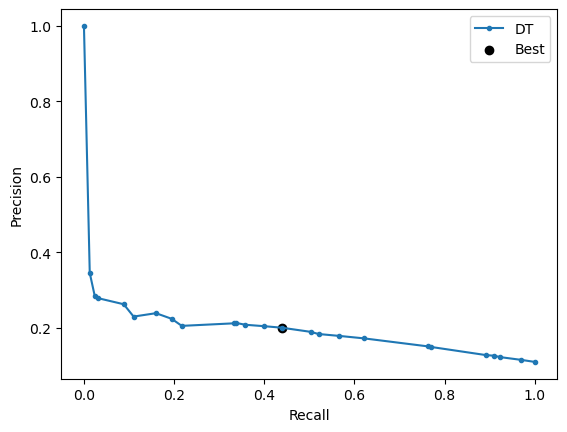

In [117]:
precision, recall, thresholds = precision_recall_curve(y_val_binary, predict_proba[:,1])
print(precision)
# apply f1 score
fscore = np.nan_to_num((2 * precision * recall) / (precision + recall))
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
Thresh = thresholds[ix]
plt.plot(recall, precision, marker='.', label='DT')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [118]:
## MultiLayer Perceptron

final_model_nn_under = MLPClassifier(hidden_layer_sizes = 8, activation='relu',solver='lbfgs',learning_rate='constant', learning_rate_init = 0.034, random_state=42, max_iter =100 )
final_model_under = final_model_nn_under.fit(X_train_undersampled, y_train_undersampled)
predict_proba = final_model_under.predict_proba(X_val_new)

[0.10899775 0.1090054  0.10901306 ... 0.         0.         1.        ]
Best Threshold=0.528612, F-Score=0.270


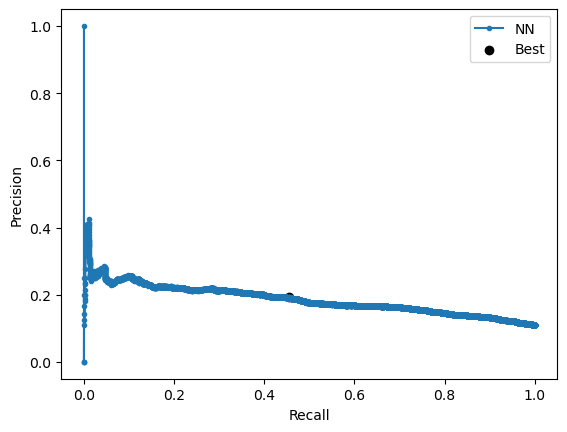

In [119]:
precision, recall, thresholds = precision_recall_curve(y_val_binary, predict_proba[:,1])
print(precision)
# apply f1 score
fscore = np.nan_to_num((2 * precision * recall) / (precision + recall))
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
Thresh = thresholds[ix]
plt.plot(recall, precision, marker='.', label='NN')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [120]:
## Random Forest
random_forest_best = RandomForestClassifier(n_estimators = 300, bootstrap= True,max_samples= 0.2, max_depth=8 )

final_model_under = random_forest_best.fit(X_train_undersampled, y_train_undersampled)
predict_proba = final_model_under.predict_proba(X_val_new)

[0.10899775 0.1090054  0.10901306 ... 0.5        1.         1.        ]
Best Threshold=0.487186, F-Score=0.281


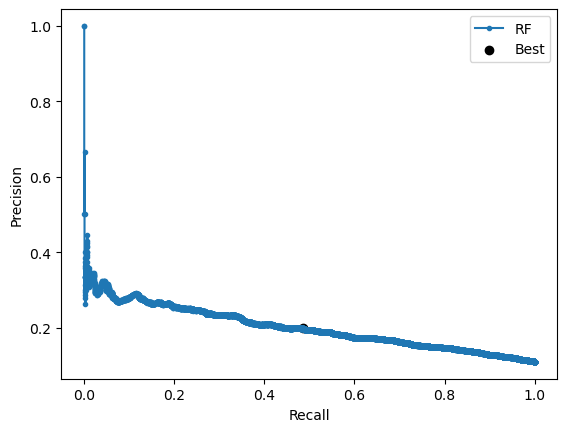

In [121]:
precision, recall, thresholds = precision_recall_curve(y_val_binary, predict_proba[:,1])
print(precision)
# apply f1 score
fscore = np.nan_to_num((2 * precision * recall) / (precision + recall))
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
Thresh = thresholds[ix]
plt.plot(recall, precision, marker='.', label='RF')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [122]:
## Stacking
stacking_model_best = StackingClassifier(estimators=estimators2, final_estimator=LogisticRegression())

final_model_under = stacking_model_best.fit(X_train_undersampled, y_train_undersampled)
predict_proba = final_model_under.predict_proba(X_val_new)

[0.10899775 0.1090054  0.10901306 ... 0.         0.         1.        ]
Best Threshold=0.482596, F-Score=0.278


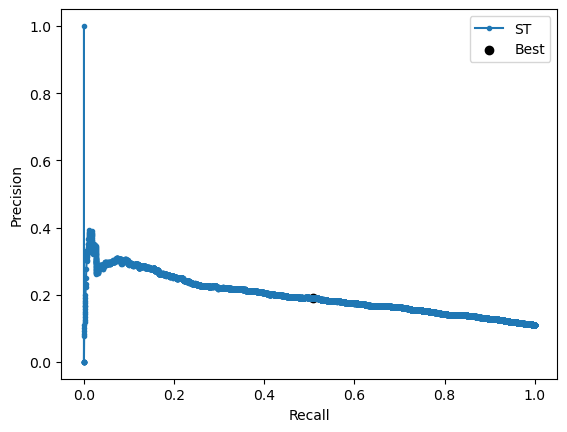

In [123]:
precision, recall, thresholds = precision_recall_curve(y_val_binary, predict_proba[:,1])
print(precision)
# apply f1 score
fscore = np.nan_to_num((2 * precision * recall) / (precision + recall))
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
Thresh = thresholds[ix]
plt.plot(recall, precision, marker='.', label='ST')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [124]:
## Gradient Boost
gradient_boost_best = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, subsample = 0.6, max_features = None , random_state=15)

final_model_under = gradient_boost_best.fit(X_train_undersampled, y_train_undersampled)
predict_proba = final_model_under.predict_proba(X_val_new)

[0.10899775 0.1090054  0.10901306 ... 0.5        1.         1.        ]
Best Threshold=0.496554, F-Score=0.280


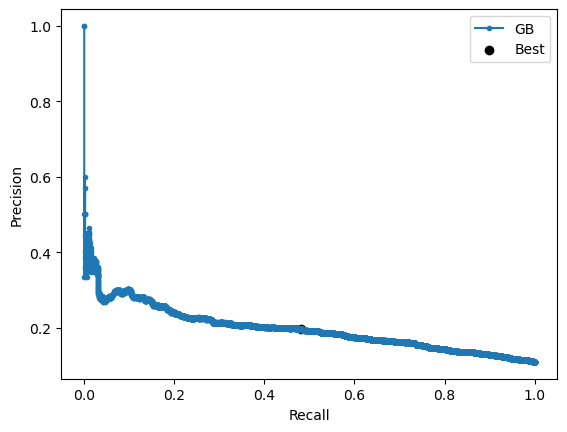

In [125]:
precision, recall, thresholds = precision_recall_curve(y_val_binary, predict_proba[:,1])
print(precision)
# apply f1 score
fscore = np.nan_to_num((2 * precision * recall) / (precision + recall))
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
Thresh = thresholds[ix]
plt.plot(recall, precision, marker='.', label='GB')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

### Binary Oversampled

From the ROC curve done before we can see that our best models are LR and NN, so lets test the threshold

In [126]:
## logistic regression

final_model_lr_over =LogisticRegression(solver = 'saga', penalty= 'l1', C= 10.0)
final_model_over = final_model_lr_over.fit(X_train_oversampled, y_train_oversampled)
predict_proba = final_model_over.predict_proba(X_val_new)

[0.10899775 0.1090054  0.10901306 ... 0.         0.         1.        ]
Best Threshold=0.436825, F-Score=0.265


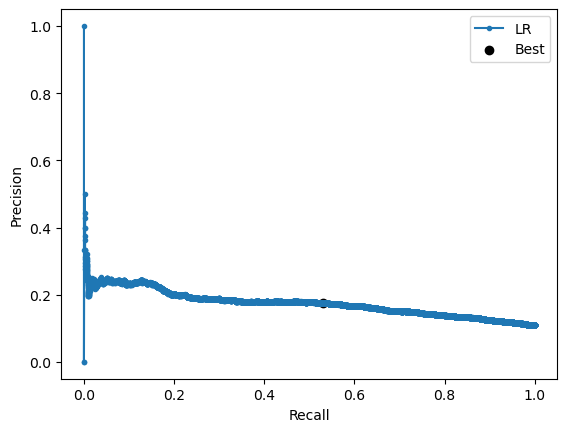

In [127]:
precision, recall, thresholds = precision_recall_curve(y_val_binary, predict_proba[:,1])
print(precision)
# apply f1 score
fscore = np.nan_to_num((2 * precision * recall) / (precision + recall))
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
Thresh = thresholds[ix]
plt.plot(recall, precision, marker='.', label='LR')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [128]:
# MultiLayer Perceptron
final_model_nn_over = MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.015, learning_rate='adaptive', solver='adam', activation='relu', max_iter=200, random_state=42)
final_model_over = final_model_nn_over.fit(X_train_oversampled, y_train_oversampled)
predict_proba = final_model_over.predict_proba(X_val_new)

[0.10899775 0.1090054  0.10901306 ... 0.         0.         1.        ]
Best Threshold=0.564321, F-Score=0.253


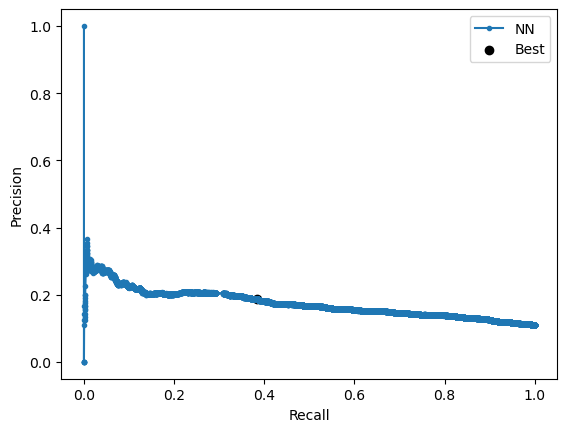

In [129]:
precision, recall, thresholds = precision_recall_curve(y_val_binary, predict_proba[:,1])
print(precision)
# apply f1 score
fscore = np.nan_to_num((2 * precision * recall) / (precision + recall))
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
Thresh = thresholds[ix]
plt.plot(recall, precision, marker='.', label='NN')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In this case, we should prioritize high recall to avoid missing positive cases, even if it means lower precision


# Kaggle Submission

In [185]:
# ada_boost_model.fit(X_train_undersampled, y_train_undersampled)
# predictions = ada_boost_model.predict(X_test)

# # Assuming 'encounter_id' is the column containing the IDs of test samples
# submission_df = pd.DataFrame({'encounter_id': df_test['encounter_id'], 'readmitted_binary': predictions})
# submission_df['readmitted_binary'] = submission_df['readmitted_binary'].replace({0: 'No', 1: 'Yes'})

# # Save the submission file
# submission_df.to_csv('Group08_Version76.csv', index=False)

In [279]:
# best_nb_oversample.fit(X_train_oversampled, y_train_oversampled)
# predictions = best_nb_oversample.predict(X_test)

# # Assuming 'encounter_id' is the column containing the IDs of test samples
# submission_df = pd.DataFrame({'encounter_id': df_test['encounter_id'], 'readmitted_binary': predictions})
# submission_df['readmitted_binary'] = submission_df['readmitted_binary'].replace({0: 'No', 1: 'Yes'})

# # Save the submission file
# submission_df.to_csv('Group08_Version63.csv', index=False)